In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

<div dir="rtl">

# تابع Sinc و مدیریت نقطه‌ی صفر

تابع sinc یکی از توابع مهم در پردازش سیگنال و تحلیل فوریه است که به صورت زیر تعریف می‌شود:

$$\text{sinc}(x) = \frac{\sin(x)}{x}$$

**چالش نقطه‌ی صفر:** در نقطه‌ی $x=0$ با یک حالت نامعین $\frac{0}{0}$ مواجه می‌شویم. اما با استفاده از قاعده‌ی لوپیتال:

$$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$$

**پیاده‌سازی عددی:** تابع `np.where` به صورت vectorized این شرط را بررسی می‌کند:
- اگر $x = 0$ باشد، مقدار 1.0 برمی‌گرداند
- در غیر این صورت، $\frac{\sin(x)}{x}$ را محاسبه می‌کند

این روش از خطاهای عددی و تقسیم بر صفر جلوگیری می‌کند.

</div>

In [2]:
def sincFunction(x):
    return np.where(x == 0, 1.0, np.sin(x) / x)

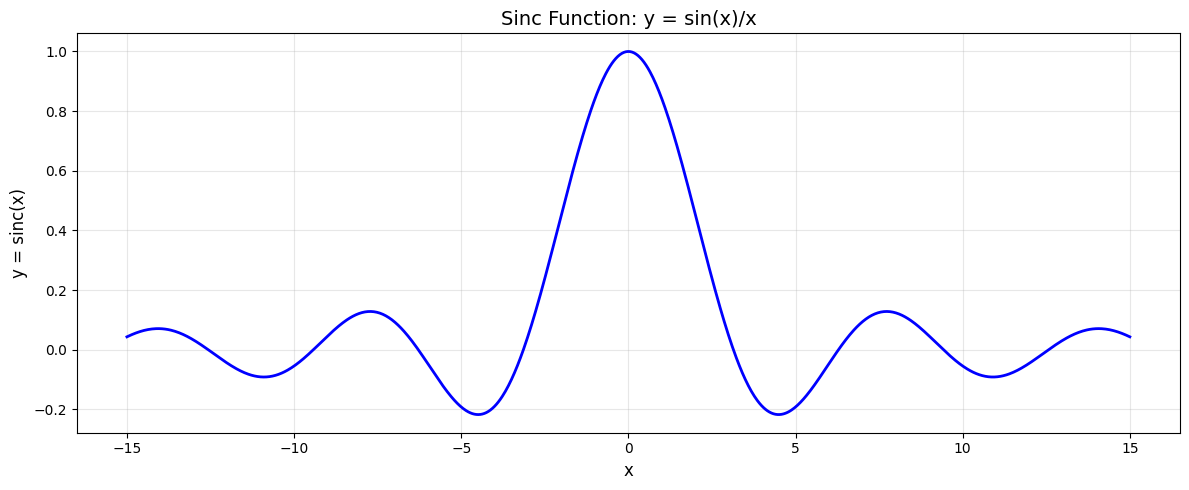

In [3]:
xRange = np.linspace(-15, 15, 1000)
yRange = sincFunction(xRange)

plt.figure(figsize=(12, 5))
plt.plot(xRange, yRange, 'b-', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y = sinc(x)', fontsize=12)
plt.title('Sinc Function: y = sin(x)/x', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div dir="rtl">

# نمونه‌برداری با تعداد نقاط متفاوت

یکی از سوالات اساسی در یادگیری ماشین: **چند نمونه برای آموزش مدل کافی است؟**

**سه سناریوی مختلف:**
- **100 نمونه:** داده‌ی محدود - احتمال underfitting یا overfitting بالا
- **300 نمونه:** تعداد متوسط - تعادل بین کارایی محاسباتی و دقت
- **1000 نمونه:** داده‌ی زیاد - مدل می‌تواند الگوهای پیچیده‌تر را یاد بگیرد

**استفاده از `linspace`:** نمونه‌برداری یکنواخت در بازه‌ی $[-15, 15]$ انجام می‌شود تا تمام نوسانات تابع sinc پوشش داده شود.

**نکته‌ی کلیدی:** تابع sinc دارای نوسانات میرا است - با دور شدن از صفر، دامنه‌ی نوسانات کاهش می‌یابد.

</div>

In [4]:
np.random.seed(42)

sampleSizes = [100, 300, 1000]
sampledData = {}

for n in sampleSizes:
    xSamples = np.linspace(-15, 15, n)
    ySamples = sincFunction(xSamples)
    sampledData[n] = {'x': xSamples, 'y': ySamples}

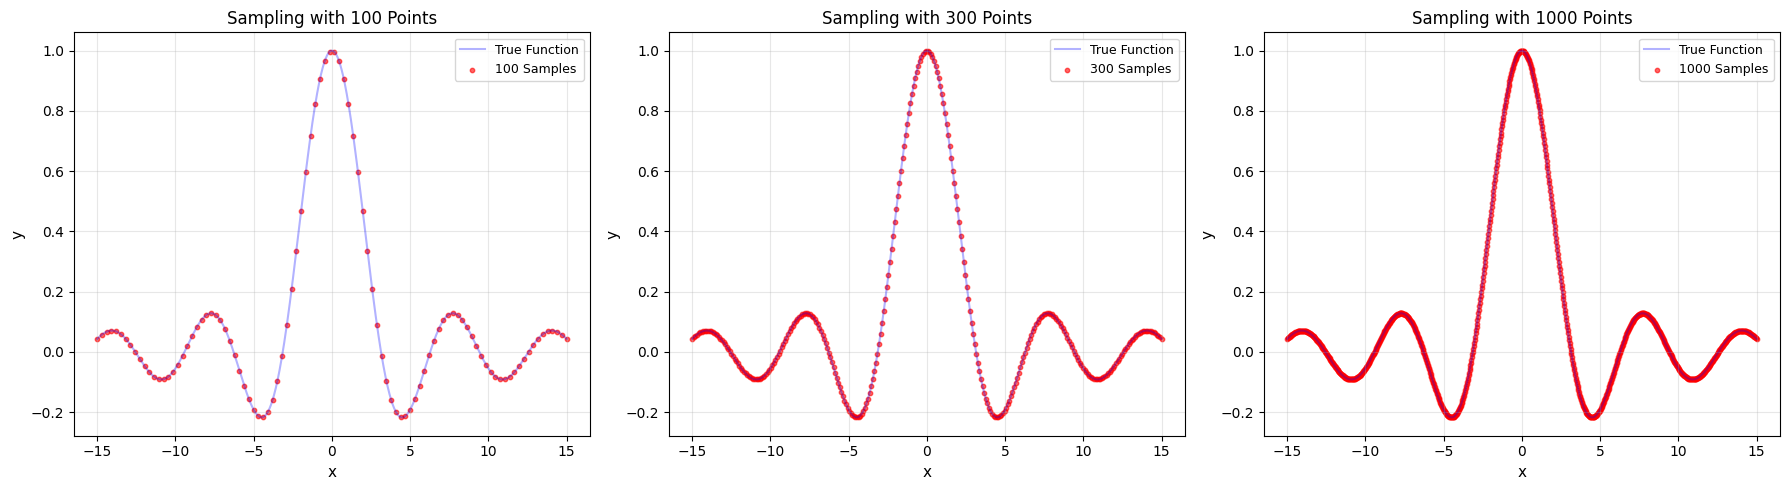

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n in enumerate(sampleSizes):
    axes[idx].plot(xRange, yRange, 'b-', alpha=0.3, label='True Function')
    axes[idx].scatter(sampledData[n]['x'], sampledData[n]['y'], 
                     c='red', s=10, alpha=0.6, label=f'{n} Samples')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'Sampling with {n} Points', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

<div dir="rtl">

# افزودن نویز گوسی به داده‌ها

در دنیای واقعی، داده‌ها هرگز کاملاً تمیز نیستند. **نویز** می‌تواند از منابع مختلف ناشی شود:
- خطای اندازه‌گیری سنسورها
- اختلالات محیطی
- گرد کردن اعداد در محاسبات

**مدل‌سازی نویز:**

$$y_{\text{noisy}} = y_{\text{true}} + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2)$$

جایی که:
- $\epsilon$ نویز گوسی با میانگین صفر و واریانس $\sigma^2 = 0.05$
- $\mathcal{N}(0, 0.05)$ نشان‌دهنده‌ی توزیع نرمال است

**چرا توزیع نرمال؟** قضیه‌ی حد مرکزی نشان می‌دهد که مجموع خطاهای کوچک مستقل به توزیع نرمال میل می‌کند.

**انتظار:** مدل‌های خوب باید در حضور نویز همچنان عملکرد قابل قبولی داشته باشند (robust باشند).

</div>

In [6]:
np.random.seed(42)

noiseVariance = 0.05
noisyData = {}

for n in sampleSizes:
    noise = np.random.normal(0, np.sqrt(noiseVariance), n)
    yNoisy = sampledData[n]['y'] + noise
    noisyData[n] = {'x': sampledData[n]['x'], 'y': yNoisy}

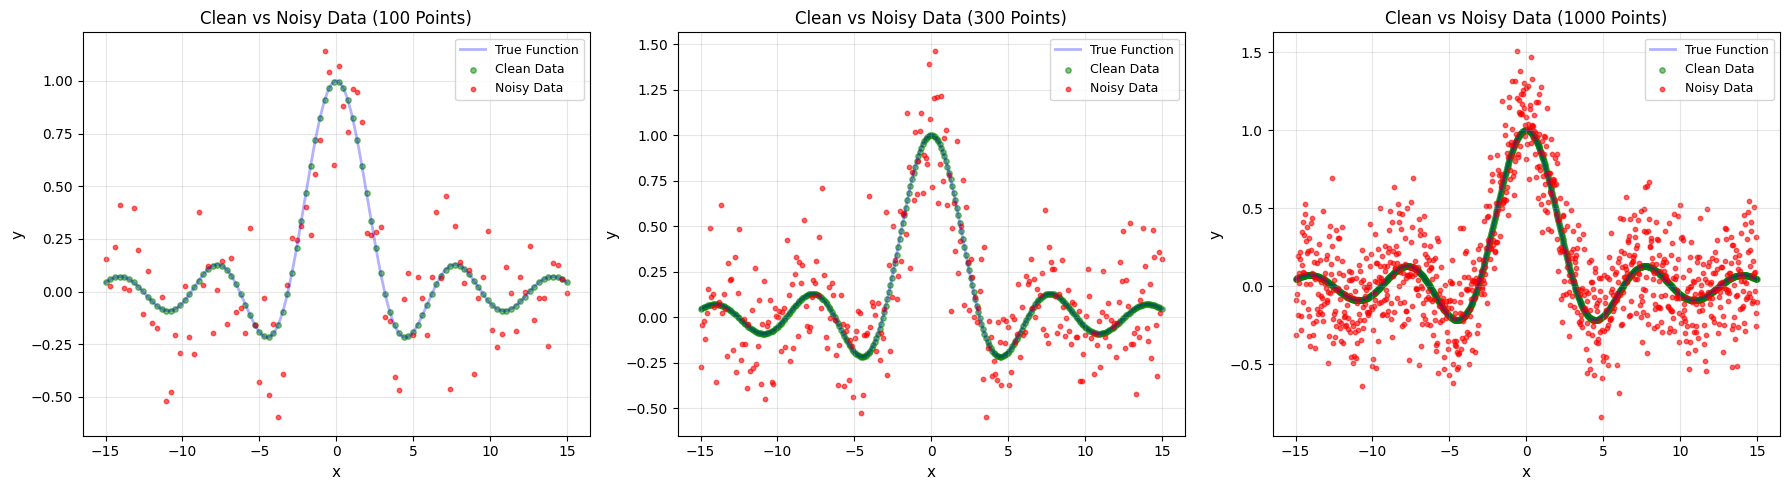

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n in enumerate(sampleSizes):
    axes[idx].plot(xRange, yRange, 'b-', alpha=0.3, label='True Function', linewidth=2)
    axes[idx].scatter(sampledData[n]['x'], sampledData[n]['y'], 
                     c='green', s=15, alpha=0.5, label='Clean Data')
    axes[idx].scatter(noisyData[n]['x'], noisyData[n]['y'], 
                     c='red', s=10, alpha=0.6, label='Noisy Data')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'Clean vs Noisy Data ({n} Points)', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

<div dir="rtl">

# رگرسیون خطی ساده (Linear Regression)

**مدل ریاضی:**

$$\hat{y} = \beta_0 + \beta_1 x$$

**محدودیت اساسی:** این مدل فقط می‌تواند یک خط راست را به داده‌ها فیت کند!

**تابع sinc:** یک تابع غیرخطی با خصوصیات زیر است:
- نوسانات متعدد
- رفتار میرا (damped oscillation)
- تقارن حول صفر

**انتظار:** با توجه به ماهیت نوسانی تابع sinc، رگرسیون خطی ساده نمی‌تواند عملکرد خوبی داشته باشد زیرا:
1. نمی‌تواند نوسانات را مدل کند
2. فقط روند کلی (trend) را تخمین می‌زند
3. MSE بالا خواهد بود

**روش حل معادلات نرمال:**

$$\beta = (X^T X)^{-1} X^T y$$

</div>

In [8]:
linearResults = {'clean': {}, 'noisy': {}}

for n in sampleSizes:
    xTrain = sampledData[n]['x'].reshape(-1, 1)
    yTrain = sampledData[n]['y']
    
    model = LinearRegression()
    model.fit(xTrain, yTrain)
    
    yPredClean = model.predict(xRange.reshape(-1, 1))
    mseClean = mean_squared_error(sincFunction(sampledData[n]['x']), model.predict(xTrain))
    maeClean = mean_absolute_error(sincFunction(sampledData[n]['x']), model.predict(xTrain))
    
    linearResults['clean'][n] = {
        'prediction': yPredClean,
        'mse': mseClean,
        'mae': maeClean
    }
    
    yTrainNoisy = noisyData[n]['y']
    model.fit(xTrain, yTrainNoisy)
    
    yPredNoisy = model.predict(xRange.reshape(-1, 1))
    mseNoisy = mean_squared_error(sincFunction(sampledData[n]['x']), model.predict(xTrain))
    maeNoisy = mean_absolute_error(sincFunction(sampledData[n]['x']), model.predict(xTrain))
    
    linearResults['noisy'][n] = {
        'prediction': yPredNoisy,
        'mse': mseNoisy,
        'mae': maeNoisy
    }

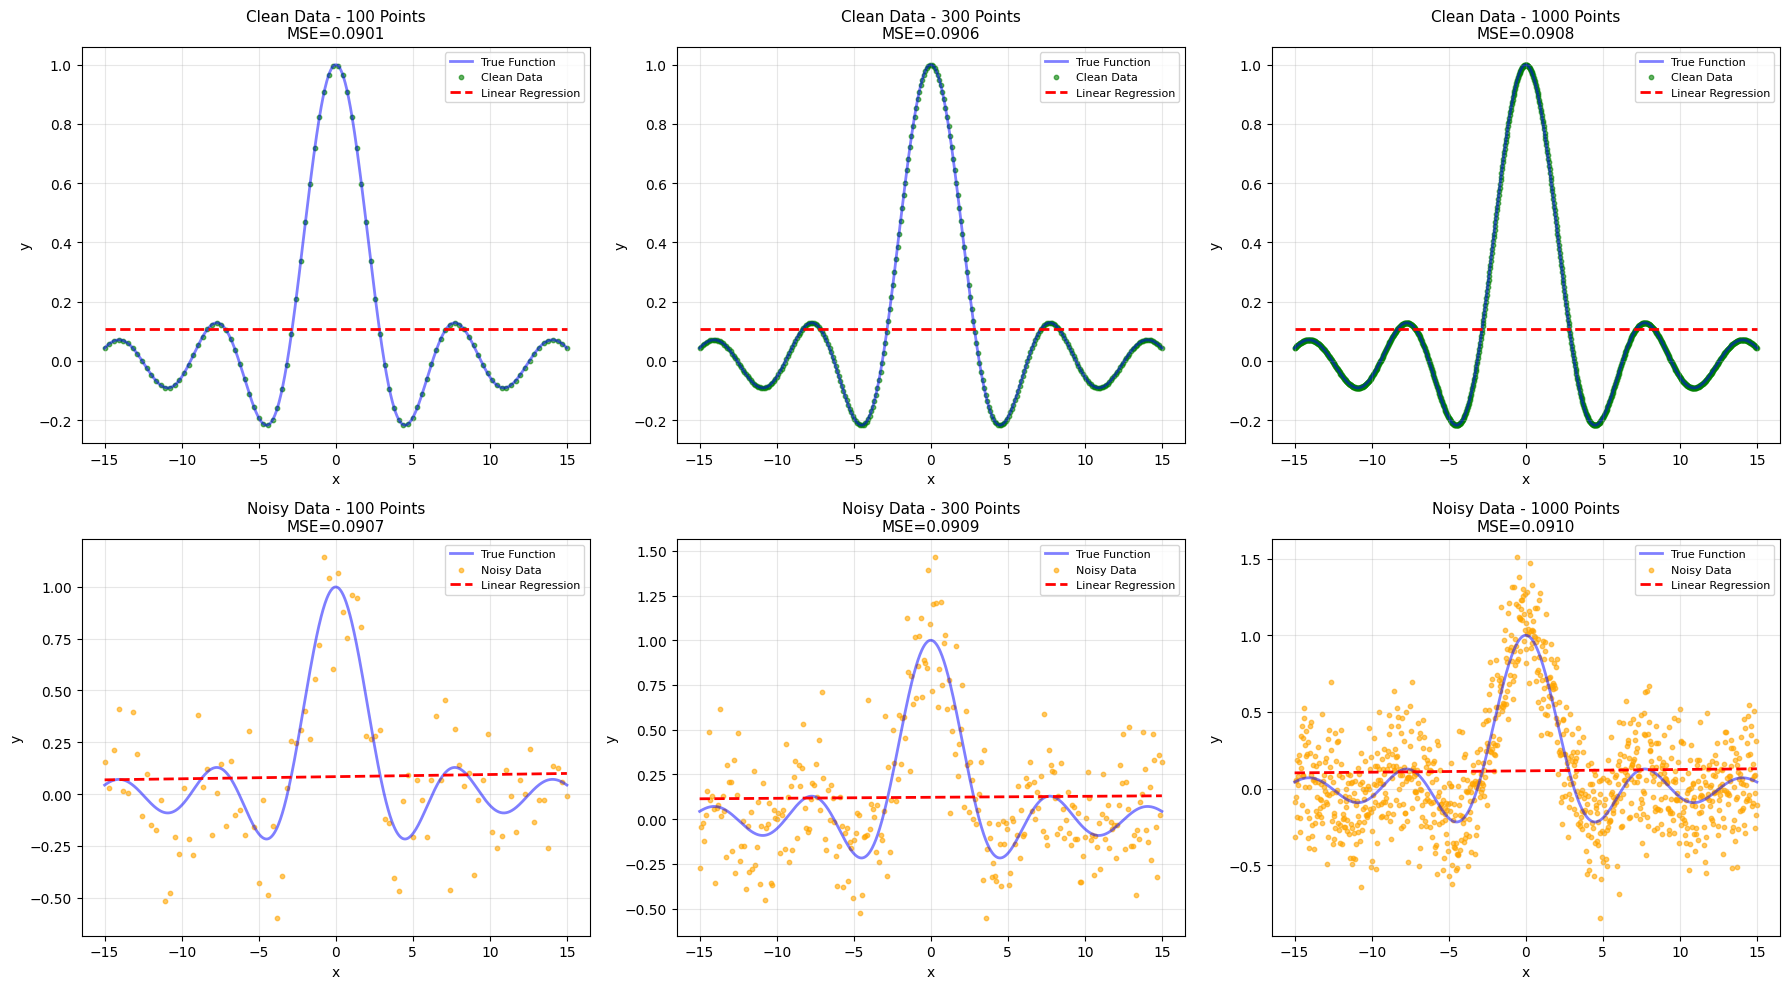

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    axes[0, idx].plot(xRange, yRange, 'b-', alpha=0.5, label='True Function', linewidth=2)
    axes[0, idx].scatter(sampledData[n]['x'], sampledData[n]['y'], 
                        c='green', s=10, alpha=0.6, label='Clean Data')
    axes[0, idx].plot(xRange, linearResults['clean'][n]['prediction'], 
                     'r--', linewidth=2, label='Linear Regression')
    axes[0, idx].set_xlabel('x', fontsize=10)
    axes[0, idx].set_ylabel('y', fontsize=10)
    axes[0, idx].set_title(f'Clean Data - {n} Points\nMSE={linearResults["clean"][n]["mse"]:.4f}', fontsize=11)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=8)
    
    axes[1, idx].plot(xRange, yRange, 'b-', alpha=0.5, label='True Function', linewidth=2)
    axes[1, idx].scatter(noisyData[n]['x'], noisyData[n]['y'], 
                        c='orange', s=10, alpha=0.6, label='Noisy Data')
    axes[1, idx].plot(xRange, linearResults['noisy'][n]['prediction'], 
                     'r--', linewidth=2, label='Linear Regression')
    axes[1, idx].set_xlabel('x', fontsize=10)
    axes[1, idx].set_ylabel('y', fontsize=10)
    axes[1, idx].set_title(f'Noisy Data - {n} Points\nMSE={linearResults["noisy"][n]["mse"]:.4f}', fontsize=11)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

<div dir="rtl">

# رگرسیون چندجمله‌ای (Polynomial Regression)

برای مدل کردن توابع پیچیده‌تر، ویژگی‌های چندجمله‌ای به فضای ورودی اضافه می‌کنیم:

**تبدیل ویژگی:**

$$\phi(x) = [1, x, x^2, x^3, ..., x^d]$$

**مدل نهایی:**

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_d x^d$$

**معضل انتخاب درجه ($d$):**

- **درجه‌ی پایین:** underfitting → نمی‌تواند پیچیدگی داده را یاد بگیرد
- **درجه‌ی بالا:** overfitting → نویز را هم یاد می‌گیرد، generalization ضعیف

**استراتژی هوشمندانه:** برای هر تعداد نمونه، محدوده‌ی مناسبی از درجات را آزمایش می‌کنیم:
- 100 نمونه → درجات 2 تا 20 (محدودتر برای جلوگیری از overfitting)
- 300 نمونه → درجات 2 تا 30
- 1000 نمونه → درجات 2 تا 50 (داده‌ی بیشتر = قدرت مدل‌سازی بالاتر)

**قانون کلی:** با افزایش تعداد نمونه‌ها، می‌توانیم از درجات بالاتر بدون ترس از overfitting استفاده کنیم.

</div>

In [10]:
polynomialDegrees = {
    100: range(2, 21),
    300: range(2, 31),
    1000: range(2, 51)
}

polynomialResults = {'clean': {n: {} for n in sampleSizes}, 
                     'noisy': {n: {} for n in sampleSizes}}

In [11]:
for n in sampleSizes:
    xTrain = sampledData[n]['x'].reshape(-1, 1)
    yTrainClean = sampledData[n]['y']
    yTrainNoisy = noisyData[n]['y']
    yTrue = sincFunction(sampledData[n]['x'])
    
    for degree in polynomialDegrees[n]:
        poly = PolynomialFeatures(degree=degree)
        xTrainPoly = poly.fit_transform(xTrain)
        xRangePoly = poly.transform(xRange.reshape(-1, 1))
        
        modelClean = LinearRegression()
        modelClean.fit(xTrainPoly, yTrainClean)
        yPredClean = modelClean.predict(xRangePoly)
        yPredTrainClean = modelClean.predict(xTrainPoly)
        
        mseClean = mean_squared_error(yTrue, yPredTrainClean)
        maeClean = mean_absolute_error(yTrue, yPredTrainClean)
        
        polynomialResults['clean'][n][degree] = {
            'prediction': yPredClean,
            'mse': mseClean,
            'mae': maeClean
        }
        
        modelNoisy = LinearRegression()
        modelNoisy.fit(xTrainPoly, yTrainNoisy)
        yPredNoisy = modelNoisy.predict(xRangePoly)
        yPredTrainNoisy = modelNoisy.predict(xTrainPoly)
        
        mseNoisy = mean_squared_error(yTrue, yPredTrainNoisy)
        maeNoisy = mean_absolute_error(yTrue, yPredTrainNoisy)
        
        polynomialResults['noisy'][n][degree] = {
            'prediction': yPredNoisy,
            'mse': mseNoisy,
            'mae': maeNoisy
        }

print("Polynomial regression completed for all degrees and sample sizes.")

Polynomial regression completed for all degrees and sample sizes.


<div dir="rtl">

# مقیاس لگاریتمی برای محور MSE

**چرا مقیاس لگاریتمی؟**

وقتی مقادیر خطا در محدوده‌های مختلف تغییر می‌کنند (مثلاً از 0.001 تا 10)، نمودار خطی نمی‌تواند به خوبی تغییرات را نشان دهد.

**مزایای مقیاس log:**
- تغییرات در مقادیر کوچک واضح‌تر می‌شود
- می‌توانیم نرخ تغییر (rate of change) را بهتر ببینیم
- چند مرتبه بزرگی (orders of magnitude) را در یک نمودار جا می‌دهیم

**تفسیر نمودار:**
- سقوط تند در ابتدا = بهبود سریع با افزایش درجه
- نقطه‌ی حداقل = بهترین درجه (sweet spot)
- افزایش بعد از حداقل = overfitting

</div>

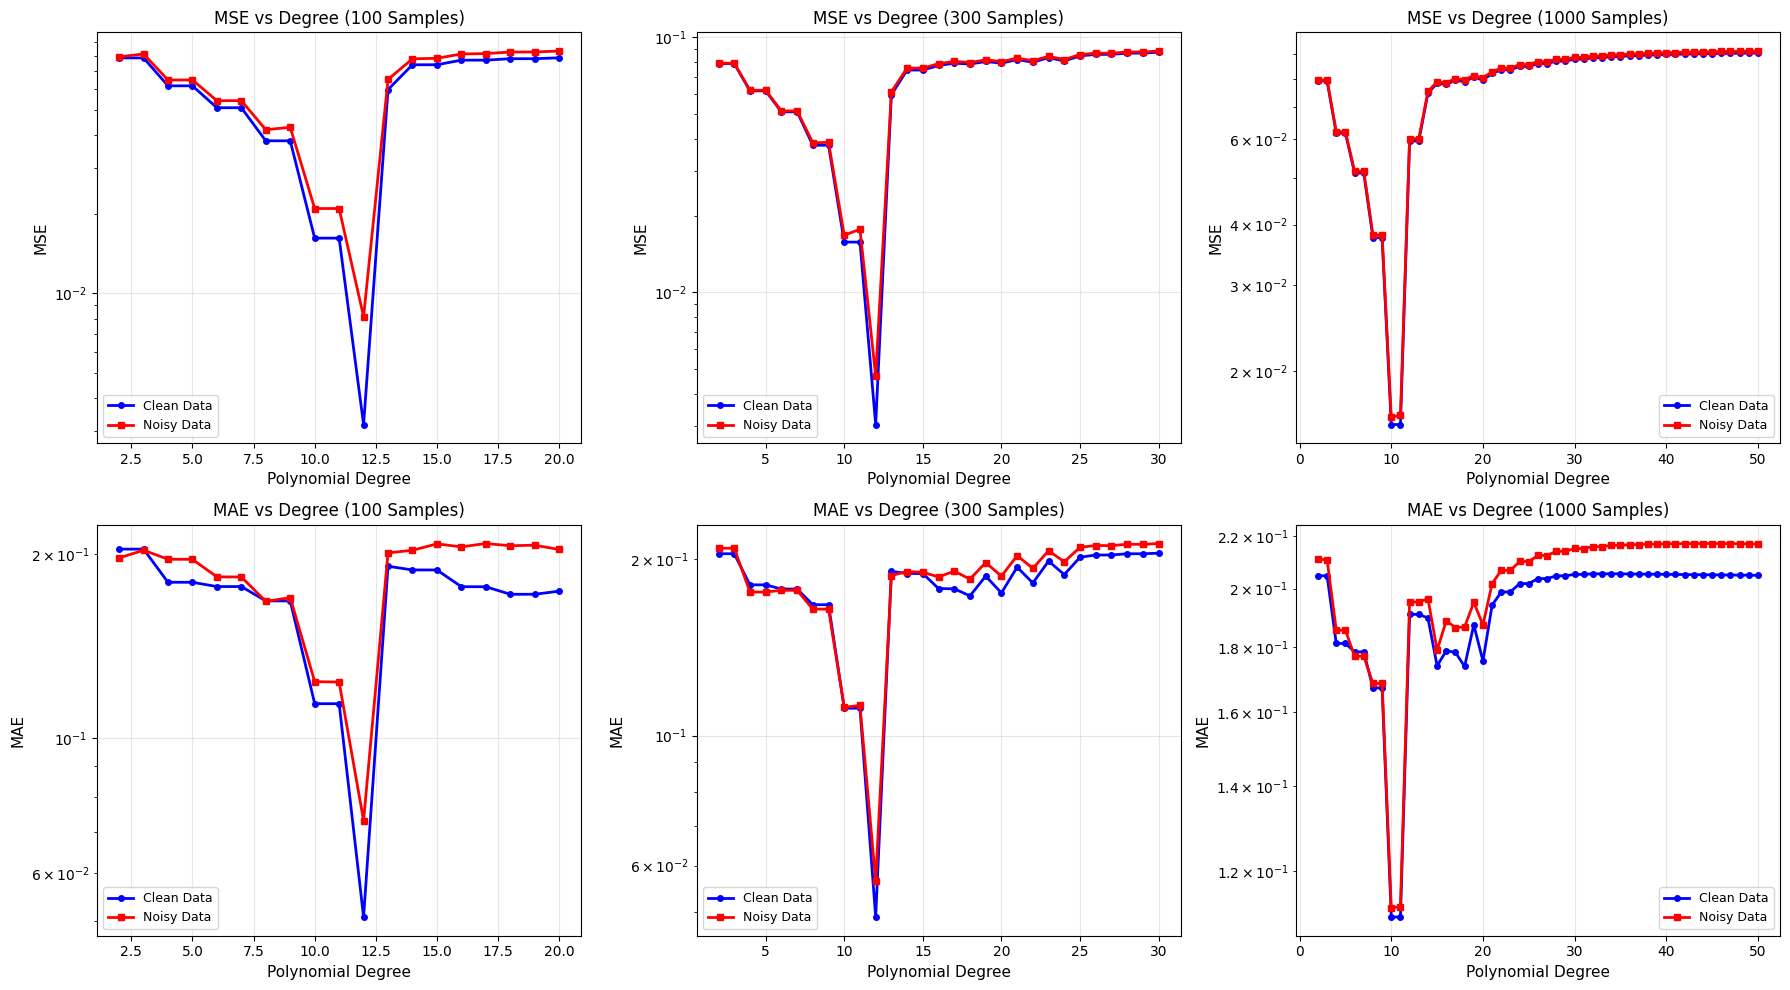

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    degrees = list(polynomialDegrees[n])
    mseClean = [polynomialResults['clean'][n][d]['mse'] for d in degrees]
    mseNoisy = [polynomialResults['noisy'][n][d]['mse'] for d in degrees]
    maeClean = [polynomialResults['clean'][n][d]['mae'] for d in degrees]
    maeNoisy = [polynomialResults['noisy'][n][d]['mae'] for d in degrees]
    
    axes[0, idx].plot(degrees, mseClean, 'b-o', label='Clean Data', linewidth=2, markersize=4)
    axes[0, idx].plot(degrees, mseNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=4)
    axes[0, idx].set_xlabel('Polynomial Degree', fontsize=11)
    axes[0, idx].set_ylabel('MSE', fontsize=11)
    axes[0, idx].set_title(f'MSE vs Degree ({n} Samples)', fontsize=12)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].set_yscale('log')
    
    axes[1, idx].plot(degrees, maeClean, 'b-o', label='Clean Data', linewidth=2, markersize=4)
    axes[1, idx].plot(degrees, maeNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=4)
    axes[1, idx].set_xlabel('Polynomial Degree', fontsize=11)
    axes[1, idx].set_ylabel('MAE', fontsize=11)
    axes[1, idx].set_title(f'MAE vs Degree ({n} Samples)', fontsize=12)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].set_yscale('log')

plt.tight_layout()
plt.show()

<div dir="rtl">

# انتخاب بهترین درجه چندجمله‌ای

**معیار انتخاب:** کمترین خطای میانگین مربعات (MSE) روی داده‌های آموزش

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**نکته‌ی مهم:** در عمل، باید از cross-validation یا validation set استفاده کنیم تا از overfitting جلوگیری کنیم. اینجا برای سادگی فقط روی training set ارزیابی می‌کنیم.

**الگوی مشاهده شده:**
- با افزایش تعداد نمونه‌ها، بهترین درجه ممکن است تغییر کند
- داده‌های noisy به درجات پایین‌تر نیاز دارند (برای اجتناب از یادگیری نویز)

</div>

In [13]:
print("Best Polynomial Degrees:\n")

for n in sampleSizes:
    degrees = list(polynomialDegrees[n])
    
    mseClean = [polynomialResults['clean'][n][d]['mse'] for d in degrees]
    bestDegreeClean = degrees[np.argmin(mseClean)]
    bestMseClean = min(mseClean)
    
    mseNoisy = [polynomialResults['noisy'][n][d]['mse'] for d in degrees]
    bestDegreeNoisy = degrees[np.argmin(mseNoisy)]
    bestMseNoisy = min(mseNoisy)
    
    print(f"{n} Samples:")
    print(f"  Clean Data: Degree {bestDegreeClean} (MSE = {bestMseClean:.6f})")
    print(f"  Noisy Data: Degree {bestDegreeNoisy} (MSE = {bestMseNoisy:.6f})")
    print()

Best Polynomial Degrees:

100 Samples:
  Clean Data: Degree 12 (MSE = 0.003173)
  Noisy Data: Degree 12 (MSE = 0.008166)

300 Samples:
  Clean Data: Degree 12 (MSE = 0.003027)
  Noisy Data: Degree 12 (MSE = 0.004689)

1000 Samples:
  Clean Data: Degree 10 (MSE = 0.015504)
  Noisy Data: Degree 10 (MSE = 0.016045)



<div dir="rtl">


**مقایسه‌ی کیفی:** گراف‌ها به ما اجازه می‌دهند که بصری ارزیابی کنیم:

1. **تطابق با تابع اصلی:** آیا منحنی مدل با تابع واقعی همپوشانی دارد؟
2. **نوسانات اضافی:** آیا مدل در نواحی بین نقاط، رفتارهای عجیب دارد؟
3. **رفتار در مرزها:** چه اتفاقی در لبه‌های بازه می‌افتد؟

**تشخیص overfitting:** اگر منحنی بین نقاط نوسانات شدید و غیرواقعی داشته باشد، نشانه‌ی overfitting است.

**تشخیص underfitting:** اگر منحنی نتواند نوسانات اصلی تابع را دنبال کند، underfitting رخ داده است.

</div>

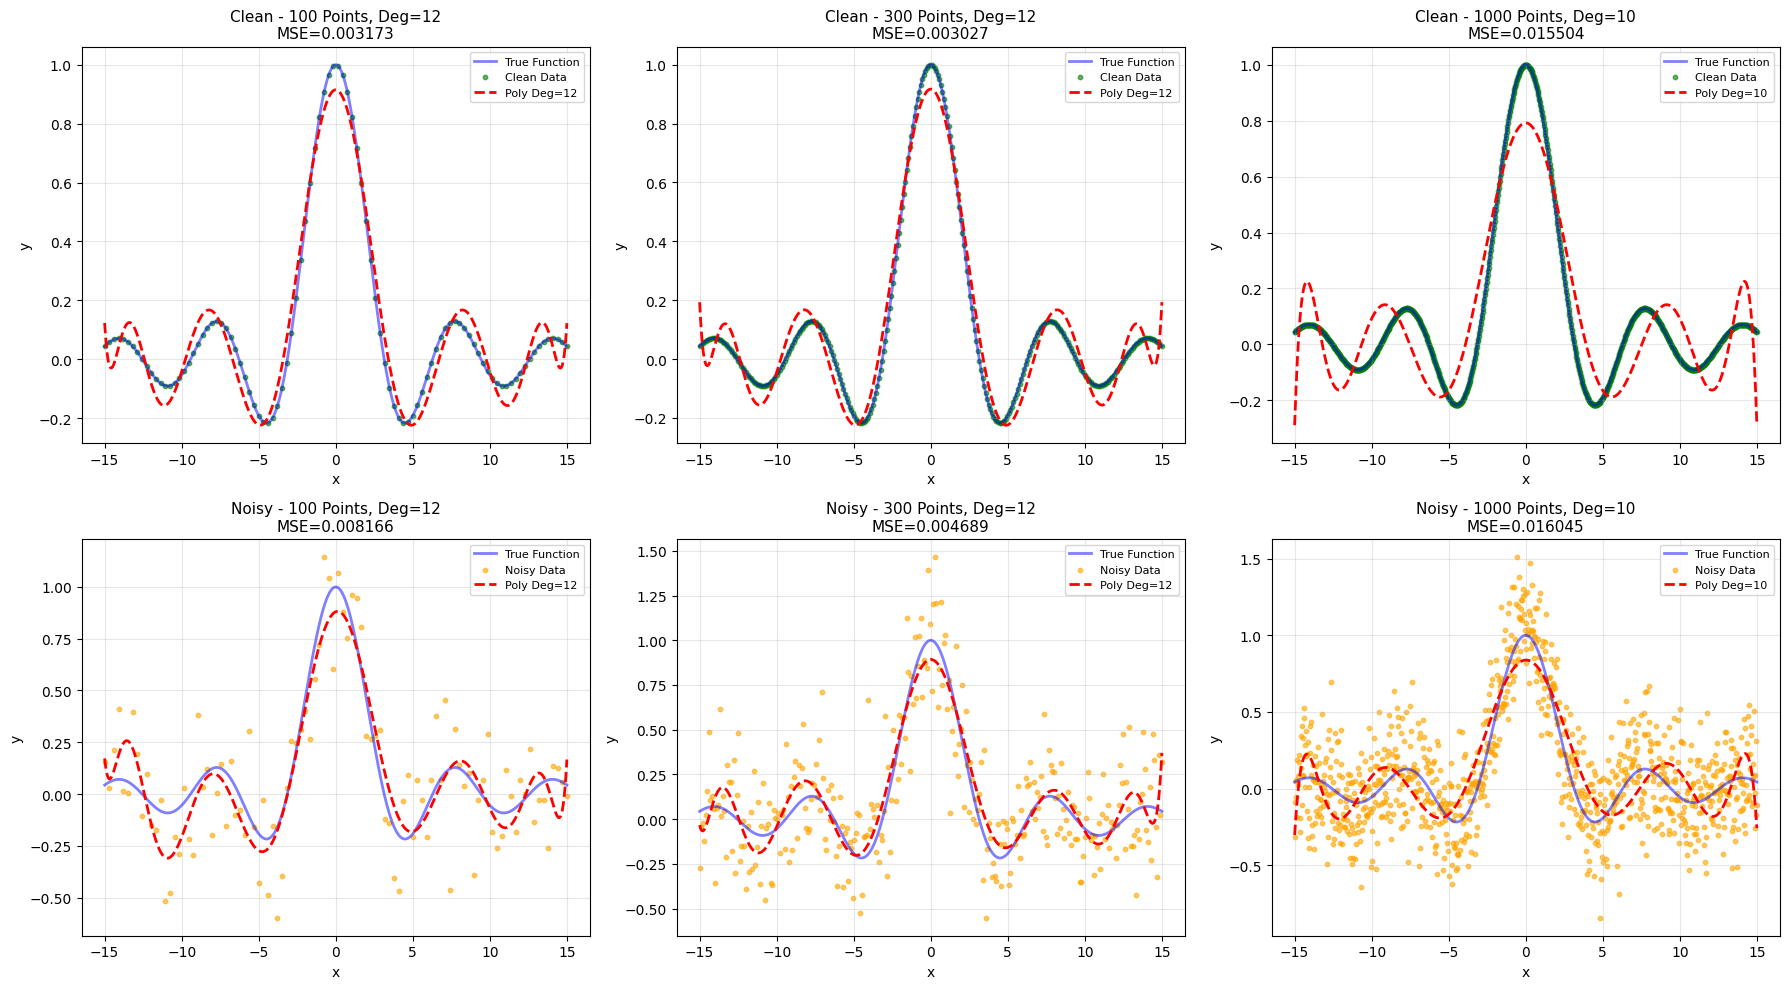

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    degrees = list(polynomialDegrees[n])
    
    mseClean = [polynomialResults['clean'][n][d]['mse'] for d in degrees]
    bestDegreeClean = degrees[np.argmin(mseClean)]
    
    mseNoisy = [polynomialResults['noisy'][n][d]['mse'] for d in degrees]
    bestDegreeNoisy = degrees[np.argmin(mseNoisy)]
    
    axes[0, idx].plot(xRange, yRange, 'b-', alpha=0.5, label='True Function', linewidth=2)
    axes[0, idx].scatter(sampledData[n]['x'], sampledData[n]['y'], 
                        c='green', s=10, alpha=0.6, label='Clean Data')
    axes[0, idx].plot(xRange, polynomialResults['clean'][n][bestDegreeClean]['prediction'], 
                     'r--', linewidth=2, label=f'Poly Deg={bestDegreeClean}')
    axes[0, idx].set_xlabel('x', fontsize=10)
    axes[0, idx].set_ylabel('y', fontsize=10)
    axes[0, idx].set_title(f'Clean - {n} Points, Deg={bestDegreeClean}\nMSE={polynomialResults["clean"][n][bestDegreeClean]["mse"]:.6f}', fontsize=11)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=8)
    
    axes[1, idx].plot(xRange, yRange, 'b-', alpha=0.5, label='True Function', linewidth=2)
    axes[1, idx].scatter(noisyData[n]['x'], noisyData[n]['y'], 
                        c='orange', s=10, alpha=0.6, label='Noisy Data')
    axes[1, idx].plot(xRange, polynomialResults['noisy'][n][bestDegreeNoisy]['prediction'], 
                     'r--', linewidth=2, label=f'Poly Deg={bestDegreeNoisy}')
    axes[1, idx].set_xlabel('x', fontsize=10)
    axes[1, idx].set_ylabel('y', fontsize=10)
    axes[1, idx].set_title(f'Noisy - {n} Points, Deg={bestDegreeNoisy}\nMSE={polynomialResults["noisy"][n][bestDegreeNoisy]["mse"]:.6f}', fontsize=11)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

<div dir="rtl">


**مسئله‌ی overfitting در چندجمله‌ای‌های با درجه بالا:**

با افزایش درجه، ضرایب $\beta$ می‌توانند خیلی بزرگ شوند و مدل به نویز overfit کند.

**راه‌حل Ridge:** پنالتی به بزرگی ضرایب اضافه می‌کنیم:

$$\min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{d} \beta_j^2 \right\}$$

**اجزای تابع هزینه:**
- جمله اول: خطای فیت روی داده‌ها (MSE)
- جمله دوم: پنالتی L2 (مجموع مربعات ضرایب)
- $\alpha$: hyperparameter که تعادل بین دو جمله را کنترل می‌کند

**تأثیر $\alpha$:**
- $\alpha = 0$: رگرسیون معمولی (بدون regularization)
- $\alpha$ کوچک: اجازه به ضرایب بزرگ‌تر
- $\alpha$ بزرگ: ضرایب به سمت صفر کشیده می‌شوند (اما کاملاً صفر نمی‌شوند)

**مزیت:** همه‌ی ویژگی‌ها حفظ می‌شوند اما تأثیرشان کنترل می‌شود.

**درجه ثابت 10:** برای تمرکز روی تأثیر $\alpha$، از یک درجه متوسط استفاده می‌کنیم.

</div>

In [15]:
alphaValues = np.logspace(-3, 3, 50)

fixedDegree = 10

ridgeResults = {'clean': {n: {} for n in sampleSizes}, 
                'noisy': {n: {} for n in sampleSizes}}

In [16]:
for n in sampleSizes:
    xTrain = sampledData[n]['x'].reshape(-1, 1)
    yTrainClean = sampledData[n]['y']
    yTrainNoisy = noisyData[n]['y']
    yTrue = sincFunction(sampledData[n]['x'])
    
    poly = PolynomialFeatures(degree=fixedDegree)
    xTrainPoly = poly.fit_transform(xTrain)
    xRangePoly = poly.transform(xRange.reshape(-1, 1))
    
    for alpha in alphaValues:
        modelClean = Ridge(alpha=alpha)
        modelClean.fit(xTrainPoly, yTrainClean)
        yPredClean = modelClean.predict(xRangePoly)
        yPredTrainClean = modelClean.predict(xTrainPoly)
        
        mseClean = mean_squared_error(yTrue, yPredTrainClean)
        maeClean = mean_absolute_error(yTrue, yPredTrainClean)
        
        ridgeResults['clean'][n][alpha] = {
            'prediction': yPredClean,
            'mse': mseClean,
            'mae': maeClean
        }
        
        modelNoisy = Ridge(alpha=alpha)
        modelNoisy.fit(xTrainPoly, yTrainNoisy)
        yPredNoisy = modelNoisy.predict(xRangePoly)
        yPredTrainNoisy = modelNoisy.predict(xTrainPoly)
        
        mseNoisy = mean_squared_error(yTrue, yPredTrainNoisy)
        maeNoisy = mean_absolute_error(yTrue, yPredTrainNoisy)
        
        ridgeResults['noisy'][n][alpha] = {
            'prediction': yPredNoisy,
            'mse': mseNoisy,
            'mae': maeNoisy
        }

print(f"Ridge regression completed with polynomial degree {fixedDegree}.")

d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.26865e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.26865e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.31042e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.31042e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.10172e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scip

Ridge regression completed with polynomial degree 10.


d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.8205e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.41346e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.41346e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.19955e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.19955e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\scipy

<div dir="rtl">


**رفتار U-شکل (U-shaped curve):**

این یک الگوی کلاسیک در یادگیری ماشین است:

1. **سمت چپ ($\alpha$ خیلی کوچک):**
   - regularization ضعیف
   - overfitting احتمالی
   - MSE ممکن است بالا باشد

2. **نقطه‌ی بهینه (minimum):**
   - تعادل کامل بین bias و variance
   - بهترین generalization

3. **سمت راست ($\alpha$ خیلی بزرگ):**
   - regularization بیش از حد
   - underfitting (مدل خیلی ساده می‌شود)
   - MSE افزایش می‌یابد

**Bias-Variance Tradeoff:**
- افزایش regularization → کاهش variance، افزایش bias
- کاهش regularization → افزایش variance، کاهش bias

**استفاده از `logspace`:** مقادیر $\alpha$ را به صورت لگاریتمی از $10^{-3}$ تا $10^3$ نمونه‌برداری می‌کنیم.

</div>

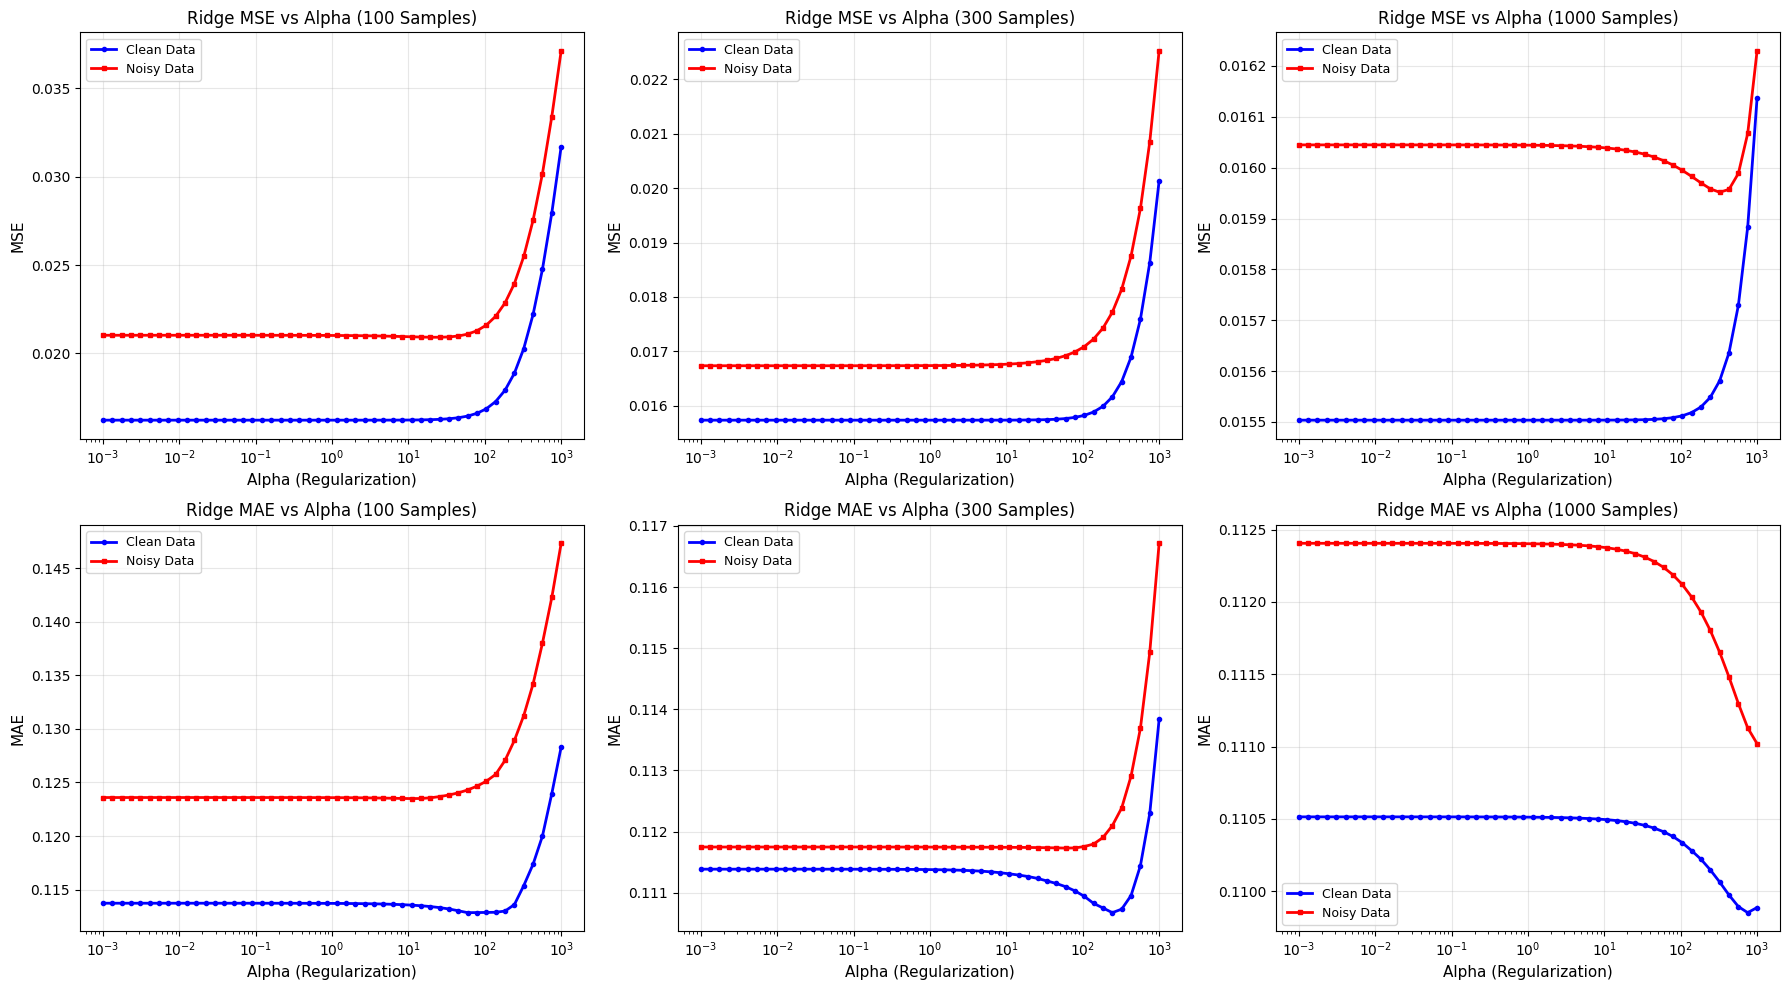

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    alphas = list(ridgeResults['clean'][n].keys())
    mseClean = [ridgeResults['clean'][n][a]['mse'] for a in alphas]
    mseNoisy = [ridgeResults['noisy'][n][a]['mse'] for a in alphas]
    maeClean = [ridgeResults['clean'][n][a]['mae'] for a in alphas]
    maeNoisy = [ridgeResults['noisy'][n][a]['mae'] for a in alphas]
    
    axes[0, idx].plot(alphas, mseClean, 'b-o', label='Clean Data', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=3)
    axes[0, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[0, idx].set_ylabel('MSE', fontsize=11)
    axes[0, idx].set_title(f'Ridge MSE vs Alpha ({n} Samples)', fontsize=12)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].set_xscale('log')
    
    axes[1, idx].plot(alphas, maeClean, 'b-o', label='Clean Data', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, maeNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=3)
    axes[1, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[1, idx].set_ylabel('MAE', fontsize=11)
    axes[1, idx].set_title(f'Ridge MAE vs Alpha ({n} Samples)', fontsize=12)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].set_xscale('log')

plt.tight_layout()
plt.show()

In [18]:
print(f"Best Ridge Alpha Values (Polynomial Degree {fixedDegree}):\n")

for n in sampleSizes:
    alphas = list(ridgeResults['clean'][n].keys())
    
    mseClean = [ridgeResults['clean'][n][a]['mse'] for a in alphas]
    bestAlphaClean = alphas[np.argmin(mseClean)]
    bestMseClean = min(mseClean)
    
    mseNoisy = [ridgeResults['noisy'][n][a]['mse'] for a in alphas]
    bestAlphaNoisy = alphas[np.argmin(mseNoisy)]
    bestMseNoisy = min(mseNoisy)
    
    print(f"{n} Samples:")
    print(f"  Clean Data: Alpha {bestAlphaClean:.4f} (MSE = {bestMseClean:.6f})")
    print(f"  Noisy Data: Alpha {bestAlphaNoisy:.4f} (MSE = {bestMseNoisy:.6f})")
    print()

Best Ridge Alpha Values (Polynomial Degree 10):

100 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.016230)
  Noisy Data: Alpha 25.5955 (MSE = 0.020918)

300 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.015735)
  Noisy Data: Alpha 0.0010 (MSE = 0.016735)

1000 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.015504)
  Noisy Data: Alpha 323.7458 (MSE = 0.015952)



<div dir="rtl">

# رگرسیون Lasso (L1 Regularization)

**تفاوت اساسی با Ridge:** استفاده از قدر مطلق به جای مربع

$$\min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{d} |\beta_j| \right\}$$

**ویژگی منحصر به فرد Lasso: Sparsity**

پنالتی L1 می‌تواند برخی ضرایب را **دقیقاً صفر** کند:

$$\beta_j = 0 \quad \text{for some } j$$

این یعنی:
- **Feature Selection خودکار:** ویژگی‌های غیرضروری حذف می‌شوند
- **مدل تفسیرپذیرتر:** فقط ویژگی‌های مهم باقی می‌مانند
- **کاهش ابعاد:** در فضاهای با ابعاد بالا مفید است

**مقایسه هندسی:**
- Ridge: ضرایب در یک کره محدود می‌شوند (L2 ball)
- Lasso: ضرایب در یک الماس محدود می‌شوند (L1 ball) → گوشه‌ها باعث sparsity می‌شوند

**پارامتر `max_iter=10000`:** Lasso با descent روش‌های تکراری حل می‌شود (برخلاف Ridge که closed-form solution دارد).

</div>

In [19]:
lassoResults = {'clean': {n: {} for n in sampleSizes}, 
                'noisy': {n: {} for n in sampleSizes}}

for n in sampleSizes:
    xTrain = sampledData[n]['x'].reshape(-1, 1)
    yTrainClean = sampledData[n]['y']
    yTrainNoisy = noisyData[n]['y']
    yTrue = sincFunction(sampledData[n]['x'])
    
    poly = PolynomialFeatures(degree=fixedDegree)
    xTrainPoly = poly.fit_transform(xTrain)
    xRangePoly = poly.transform(xRange.reshape(-1, 1))
    
    for alpha in alphaValues:
        modelClean = Lasso(alpha=alpha, max_iter=10000)
        modelClean.fit(xTrainPoly, yTrainClean)
        yPredClean = modelClean.predict(xRangePoly)
        yPredTrainClean = modelClean.predict(xTrainPoly)
        
        mseClean = mean_squared_error(yTrue, yPredTrainClean)
        maeClean = mean_absolute_error(yTrue, yPredTrainClean)
        
        lassoResults['clean'][n][alpha] = {
            'prediction': yPredClean,
            'mse': mseClean,
            'mae': maeClean
        }
        
        modelNoisy = Lasso(alpha=alpha, max_iter=10000)
        modelNoisy.fit(xTrainPoly, yTrainNoisy)
        yPredNoisy = modelNoisy.predict(xRangePoly)
        yPredTrainNoisy = modelNoisy.predict(xTrainPoly)
        
        mseNoisy = mean_squared_error(yTrue, yPredTrainNoisy)
        maeNoisy = mean_absolute_error(yTrue, yPredTrainNoisy)
        
        lassoResults['noisy'][n][alpha] = {
            'prediction': yPredNoisy,
            'mse': mseNoisy,
            'mae': maeNoisy
        }

print(f"Lasso regression completed with polynomial degree {fixedDegree}.")

d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+00, tolerance: 9.007e-04
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.014e+00, tolerance: 1.311e-03
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+00, tolerance: 9.007e-04
  model 

Lasso regression completed with polynomial degree 10.


d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.354e+01, tolerance: 1.490e-02
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.696e+01, tolerance: 9.085e-03
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.260e+01, tolerance: 1.490e-02
  model 

<div dir="rtl">


**الگوی مشاهده شده:**

با افزایش $\alpha$:
1. تعداد ضرایب غیرصفر کاهش می‌یابد
2. مدل ساده‌تر می‌شود
3. در نهایت، همه‌ی ضرایب صفر می‌شوند → مدل ثابت!

**مقایسه با Ridge:**
- Lasso معمولاً سریع‌تر به underfitting می‌رسد
- در بسیاری از مسائل، Ridge عملکرد بهتری دارد
- Lasso وقتی بهتر است که واقعاً برخی ویژگی‌ها بی‌معنی باشند

**کاربرد عملی Lasso:**
- داده‌های ژنتیکی (هزاران ژن، فقط تعدادی مهم هستند)
- پردازش متن (هزاران کلمه، فقط برخی مرتبط هستند)
- فشرده‌سازی سیگنال (compressed sensing)

</div>

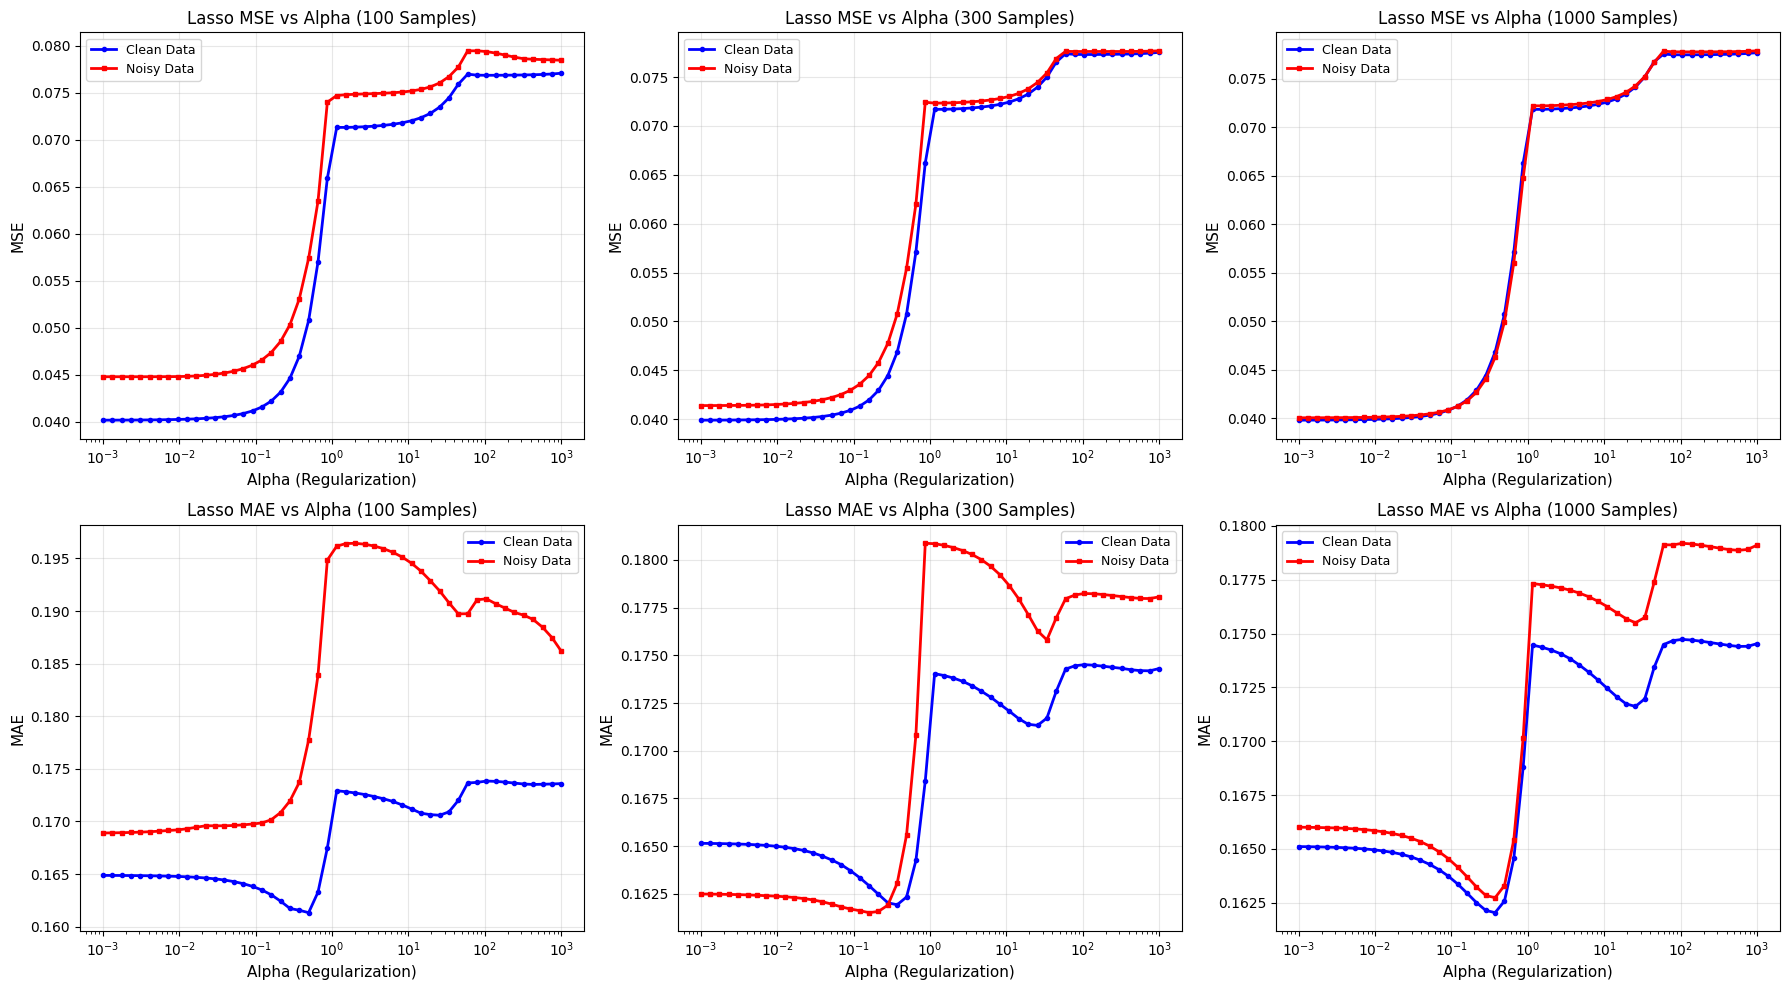

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    alphas = list(lassoResults['clean'][n].keys())
    mseClean = [lassoResults['clean'][n][a]['mse'] for a in alphas]
    mseNoisy = [lassoResults['noisy'][n][a]['mse'] for a in alphas]
    maeClean = [lassoResults['clean'][n][a]['mae'] for a in alphas]
    maeNoisy = [lassoResults['noisy'][n][a]['mae'] for a in alphas]
    
    axes[0, idx].plot(alphas, mseClean, 'b-o', label='Clean Data', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=3)
    axes[0, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[0, idx].set_ylabel('MSE', fontsize=11)
    axes[0, idx].set_title(f'Lasso MSE vs Alpha ({n} Samples)', fontsize=12)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].set_xscale('log')
    
    axes[1, idx].plot(alphas, maeClean, 'b-o', label='Clean Data', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, maeNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=3)
    axes[1, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[1, idx].set_ylabel('MAE', fontsize=11)
    axes[1, idx].set_title(f'Lasso MAE vs Alpha ({n} Samples)', fontsize=12)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].set_xscale('log')

plt.tight_layout()
plt.show()

In [21]:
print(f"Best Lasso Alpha Values (Polynomial Degree {fixedDegree}):\n")

for n in sampleSizes:
    alphas = list(lassoResults['clean'][n].keys())
    
    mseClean = [lassoResults['clean'][n][a]['mse'] for a in alphas]
    bestAlphaClean = alphas[np.argmin(mseClean)]
    bestMseClean = min(mseClean)
    
    mseNoisy = [lassoResults['noisy'][n][a]['mse'] for a in alphas]
    bestAlphaNoisy = alphas[np.argmin(mseNoisy)]
    bestMseNoisy = min(mseNoisy)
    
    print(f"{n} Samples:")
    print(f"  Clean Data: Alpha {bestAlphaClean:.4f} (MSE = {bestMseClean:.6f})")
    print(f"  Noisy Data: Alpha {bestAlphaNoisy:.4f} (MSE = {bestMseNoisy:.6f})")
    print()

Best Lasso Alpha Values (Polynomial Degree 10):

100 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.040156)
  Noisy Data: Alpha 0.0023 (MSE = 0.044776)

300 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.039905)
  Noisy Data: Alpha 0.0010 (MSE = 0.041396)

1000 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.039792)
  Noisy Data: Alpha 0.0010 (MSE = 0.040036)



<div dir="rtl">

# رگرسیون ElasticNet (ترکیب L1 و L2)

**بهترین هر دو دنیا:**

$$\min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \left( \rho \sum_{j} |\beta_j| + \frac{1-\rho}{2} \sum_{j} \beta_j^2 \right) \right\}$$

جایی که $\rho$ (`l1_ratio`) نسبت L1 است.

**تفسیر `l1_ratio`:**
- `l1_ratio = 0`: خالص Ridge (فقط L2)
- `l1_ratio = 1`: خالص Lasso (فقط L1)
- `l1_ratio = 0.5`: ترکیب برابر هر دو (انتخاب ما)

**مزایای ElasticNet:**

1. **از Ridge:** پایداری عددی و عملکرد بهتر با ویژگی‌های همبسته
2. **از Lasso:** قابلیت feature selection و sparsity
3. **انعطاف‌پذیری:** با تنظیم $\rho$ می‌توانیم بین دو رفتار حرکت کنیم

**کاربرد:** زمانی که:
- تعداد ویژگی‌ها بیشتر از تعداد نمونه‌هاست ($p > n$)
- ویژگی‌ها با هم همبستگی بالا دارند (multicollinearity)
- می‌خواهیم هم feature selection داشته باشیم هم stability

</div>

In [22]:
elasticNetResults = {'clean': {n: {} for n in sampleSizes}, 
                     'noisy': {n: {} for n in sampleSizes}}

l1Ratio = 0.5

for n in sampleSizes:
    xTrain = sampledData[n]['x'].reshape(-1, 1)
    yTrainClean = sampledData[n]['y']
    yTrainNoisy = noisyData[n]['y']
    yTrue = sincFunction(sampledData[n]['x'])
    
    poly = PolynomialFeatures(degree=fixedDegree)
    xTrainPoly = poly.fit_transform(xTrain)
    xRangePoly = poly.transform(xRange.reshape(-1, 1))
    
    for alpha in alphaValues:
        modelClean = ElasticNet(alpha=alpha, l1_ratio=l1Ratio, max_iter=10000)
        modelClean.fit(xTrainPoly, yTrainClean)
        yPredClean = modelClean.predict(xRangePoly)
        yPredTrainClean = modelClean.predict(xTrainPoly)
        
        mseClean = mean_squared_error(yTrue, yPredTrainClean)
        maeClean = mean_absolute_error(yTrue, yPredTrainClean)
        
        elasticNetResults['clean'][n][alpha] = {
            'prediction': yPredClean,
            'mse': mseClean,
            'mae': maeClean
        }
        
        modelNoisy = ElasticNet(alpha=alpha, l1_ratio=l1Ratio, max_iter=10000)
        modelNoisy.fit(xTrainPoly, yTrainNoisy)
        yPredNoisy = modelNoisy.predict(xRangePoly)
        yPredTrainNoisy = modelNoisy.predict(xTrainPoly)
        
        mseNoisy = mean_squared_error(yTrue, yPredTrainNoisy)
        maeNoisy = mean_absolute_error(yTrue, yPredTrainNoisy)
        
        elasticNetResults['noisy'][n][alpha] = {
            'prediction': yPredNoisy,
            'mse': mseNoisy,
            'mae': maeNoisy
        }

print(f"ElasticNet regression completed with polynomial degree {fixedDegree} and l1_ratio={l1Ratio}.")

d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+00, tolerance: 9.007e-04
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.012e+00, tolerance: 1.311e-03
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+00, tolerance: 9.007e-04
  model 

ElasticNet regression completed with polynomial degree 10 and l1_ratio=0.5.


d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.442e+01, tolerance: 1.490e-02
  model = cd_fast.enet_coordinate_descent(


<div dir="rtl">

# تحلیل رفتار ElasticNet

**مشاهدات کلیدی:**

با `l1_ratio = 0.5`، ElasticNet رفتاری میانه بین Ridge و Lasso دارد:

1. **مانند Lasso:** برخی ضرایب را صفر می‌کند (sparsity)
2. **مانند Ridge:** ضرایب باقیمانده به تدریج shrink می‌شوند

**انتخاب `l1_ratio`:**

در عمل، این هم یک hyperparameter است که باید tuning شود:
- اگر می‌دانید feature selection مهم است → `l1_ratio` بالاتر (مثلاً 0.7-0.9)
- اگر ویژگی‌ها همبسته هستند → `l1_ratio` پایین‌تر (مثلاً 0.3-0.5)
- اگر مطمئن نیستید → از cross-validation برای یافتن بهترین مقدار استفاده کنید

**هزینه محاسباتی:** ElasticNet کمی کندتر از Ridge است ولی معمولاً سریع‌تر از pure Lasso همگرا می‌شود.

</div>

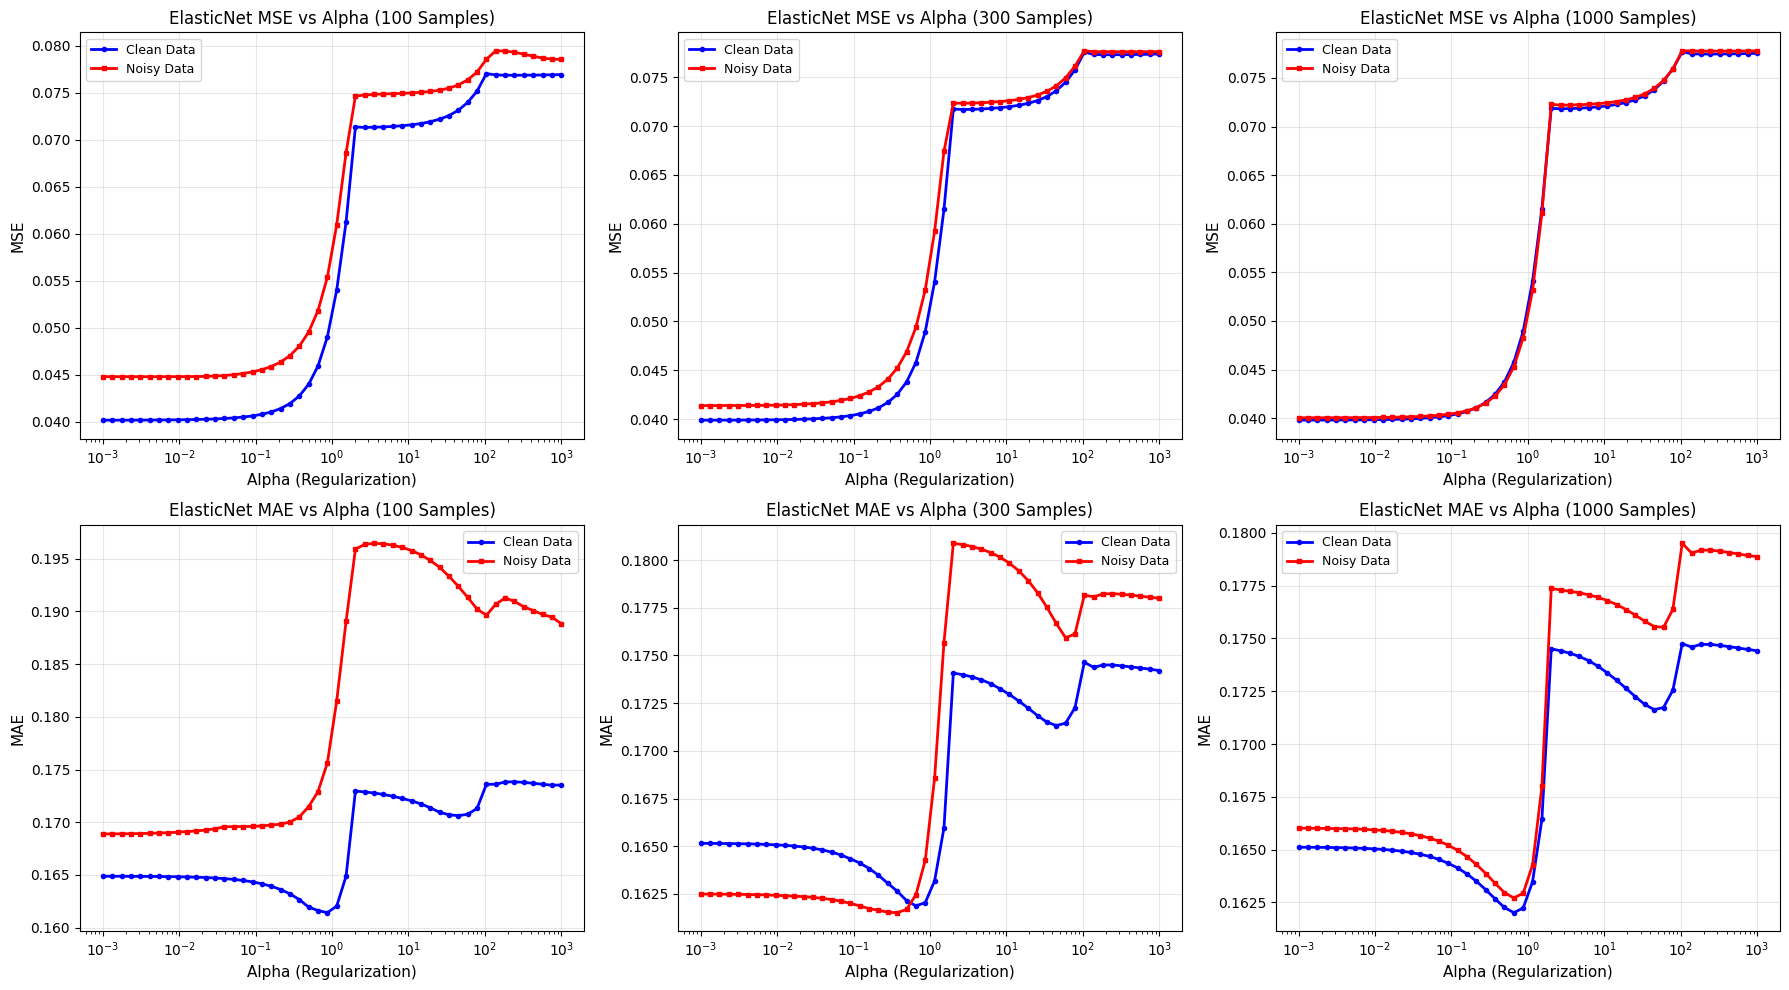

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    alphas = list(elasticNetResults['clean'][n].keys())
    mseClean = [elasticNetResults['clean'][n][a]['mse'] for a in alphas]
    mseNoisy = [elasticNetResults['noisy'][n][a]['mse'] for a in alphas]
    maeClean = [elasticNetResults['clean'][n][a]['mae'] for a in alphas]
    maeNoisy = [elasticNetResults['noisy'][n][a]['mae'] for a in alphas]
    
    axes[0, idx].plot(alphas, mseClean, 'b-o', label='Clean Data', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=3)
    axes[0, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[0, idx].set_ylabel('MSE', fontsize=11)
    axes[0, idx].set_title(f'ElasticNet MSE vs Alpha ({n} Samples)', fontsize=12)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].set_xscale('log')
    
    axes[1, idx].plot(alphas, maeClean, 'b-o', label='Clean Data', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, maeNoisy, 'r-s', label='Noisy Data', linewidth=2, markersize=3)
    axes[1, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[1, idx].set_ylabel('MAE', fontsize=11)
    axes[1, idx].set_title(f'ElasticNet MAE vs Alpha ({n} Samples)', fontsize=12)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].set_xscale('log')

plt.tight_layout()
plt.show()

In [24]:
print(f"Best ElasticNet Alpha Values (Polynomial Degree {fixedDegree}, l1_ratio={l1Ratio}):\n")

for n in sampleSizes:
    alphas = list(elasticNetResults['clean'][n].keys())
    
    mseClean = [elasticNetResults['clean'][n][a]['mse'] for a in alphas]
    bestAlphaClean = alphas[np.argmin(mseClean)]
    bestMseClean = min(mseClean)
    
    mseNoisy = [elasticNetResults['noisy'][n][a]['mse'] for a in alphas]
    bestAlphaNoisy = alphas[np.argmin(mseNoisy)]
    bestMseNoisy = min(mseNoisy)
    
    print(f"{n} Samples:")
    print(f"  Clean Data: Alpha {bestAlphaClean:.4f} (MSE = {bestMseClean:.6f})")
    print(f"  Noisy Data: Alpha {bestAlphaNoisy:.4f} (MSE = {bestMseNoisy:.6f})")
    print()

Best ElasticNet Alpha Values (Polynomial Degree 10, l1_ratio=0.5):

100 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.040152)
  Noisy Data: Alpha 0.0041 (MSE = 0.044776)

300 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.039901)
  Noisy Data: Alpha 0.0010 (MSE = 0.041392)

1000 Samples:
  Clean Data: Alpha 0.0010 (MSE = 0.039788)
  Noisy Data: Alpha 0.0010 (MSE = 0.040034)



<div dir="rtl">

# مقایسه‌ی جامع سه روش Regularization

**هدف:** دیدن همه‌ی روش‌ها در یک نمودار برای مقایسه‌ی بصری

**نکات قابل توجه در مقایسه:**

1. **Ridge معمولاً برنده است:**
   - در بیشتر سناریوها، کمترین MSE را دارد
   - پایدارتر و قابل اعتمادتر است
   - برای مسائل regression معمولی، انتخاب اول است

2. **Lasso و ElasticNet مشابه هستند:**
   - با `l1_ratio = 0.5`، ElasticNet شبیه به Lasso رفتار می‌کند
   - هر دو برای feature selection مناسب هستند
   - MSE کمی بالاتر از Ridge دارند

3. **تأثیر تعداد نمونه:**
   - با افزایش نمونه‌ها، همه‌ی روش‌ها به هم نزدیک می‌شوند
   - با 1000 نمونه، تفاوت‌ها کمتر می‌شود

**راهنمای انتخاب:**
- مسئله‌ی regression استاندارد → **Ridge**
- نیاز به feature selection → **Lasso** یا **ElasticNet**
- ویژگی‌های همبسته + sparsity → **ElasticNet**

</div>

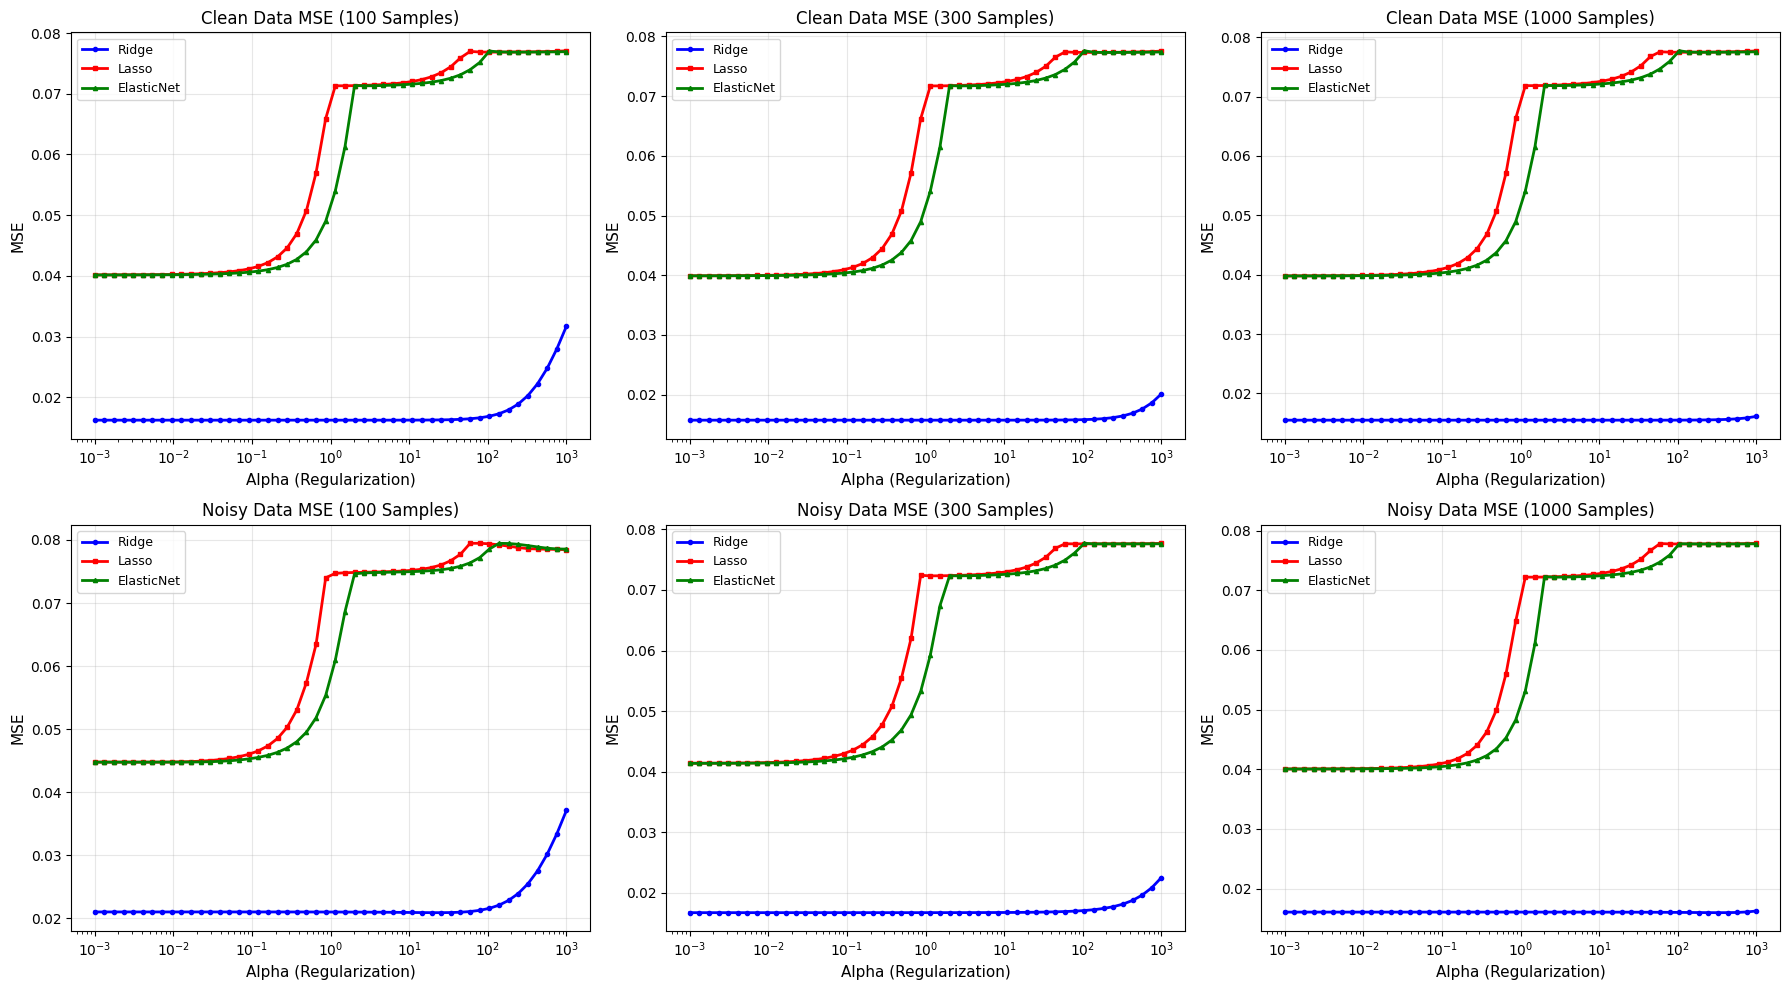

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    alphas = list(ridgeResults['clean'][n].keys())
    
    mseRidgeClean = [ridgeResults['clean'][n][a]['mse'] for a in alphas]
    mseLassoClean = [lassoResults['clean'][n][a]['mse'] for a in alphas]
    mseElasticClean = [elasticNetResults['clean'][n][a]['mse'] for a in alphas]
    
    mseRidgeNoisy = [ridgeResults['noisy'][n][a]['mse'] for a in alphas]
    mseLassoNoisy = [lassoResults['noisy'][n][a]['mse'] for a in alphas]
    mseElasticNoisy = [elasticNetResults['noisy'][n][a]['mse'] for a in alphas]
    
    axes[0, idx].plot(alphas, mseRidgeClean, 'b-o', label='Ridge', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseLassoClean, 'r-s', label='Lasso', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseElasticClean, 'g-^', label='ElasticNet', linewidth=2, markersize=3)
    axes[0, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[0, idx].set_ylabel('MSE', fontsize=11)
    axes[0, idx].set_title(f'Clean Data MSE ({n} Samples)', fontsize=12)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].set_xscale('log')
    
    axes[1, idx].plot(alphas, mseRidgeNoisy, 'b-o', label='Ridge', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, mseLassoNoisy, 'r-s', label='Lasso', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, mseElasticNoisy, 'g-^', label='ElasticNet', linewidth=2, markersize=3)
    axes[1, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[1, idx].set_ylabel('MSE', fontsize=11)
    axes[1, idx].set_title(f'Noisy Data MSE ({n} Samples)', fontsize=12)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].set_xscale('log')

plt.tight_layout()
plt.show()

<div dir="rtl">

# داده‌های پرت (Outliers) و تأثیر آن‌ها

**تعریف Outlier:** نقاطی که مقدارشان به طور غیرعادی از الگوی کلی داده فاصله دارد.

**منابع Outliers در دنیای واقعی:**
- خطای انسانی در ورود داده
- نقص سنسور یا دستگاه اندازه‌گیری
- رویدادهای استثنایی واقعی
- حملات adversarial در سیستم‌های یادگیری ماشین

**روش تولید:**

3% از داده‌ها را به صورت تصادفی با مقادیر یکنواخت در بازه $[-2, 2]$ جایگزین می‌کنیم:

$$y_{\text{outlier}} \sim \text{Uniform}(-2, 2)$$

**چرا 3%؟** مقدار واقع‌گرایانه‌ای است - در داده‌های واقعی معمولاً outlierها کمتر از 5% هستند.

**سوال کلیدی:** کدام روش regularization در برابر outliers مقاوم‌تر است؟

**انتظار:** L1 (Lasso) ممکن است مقاوم‌تر باشد چون کمتر تحت تأثیر مقادیر بزرگ قرار می‌گیرد.

</div>

In [26]:
np.random.seed(42)

outlierPercentage = 0.03
outlierData = {}

for n in sampleSizes:
    yWithOutliers = noisyData[n]['y'].copy()
    
    nOutliers = int(n * outlierPercentage)
    outlierIndices = np.random.choice(n, nOutliers, replace=False)
    
    outlierValues = np.random.uniform(-2, 2, nOutliers)
    yWithOutliers[outlierIndices] = outlierValues
    
    outlierData[n] = {
        'x': sampledData[n]['x'],
        'y': yWithOutliers,
        'outlier_indices': outlierIndices
    }

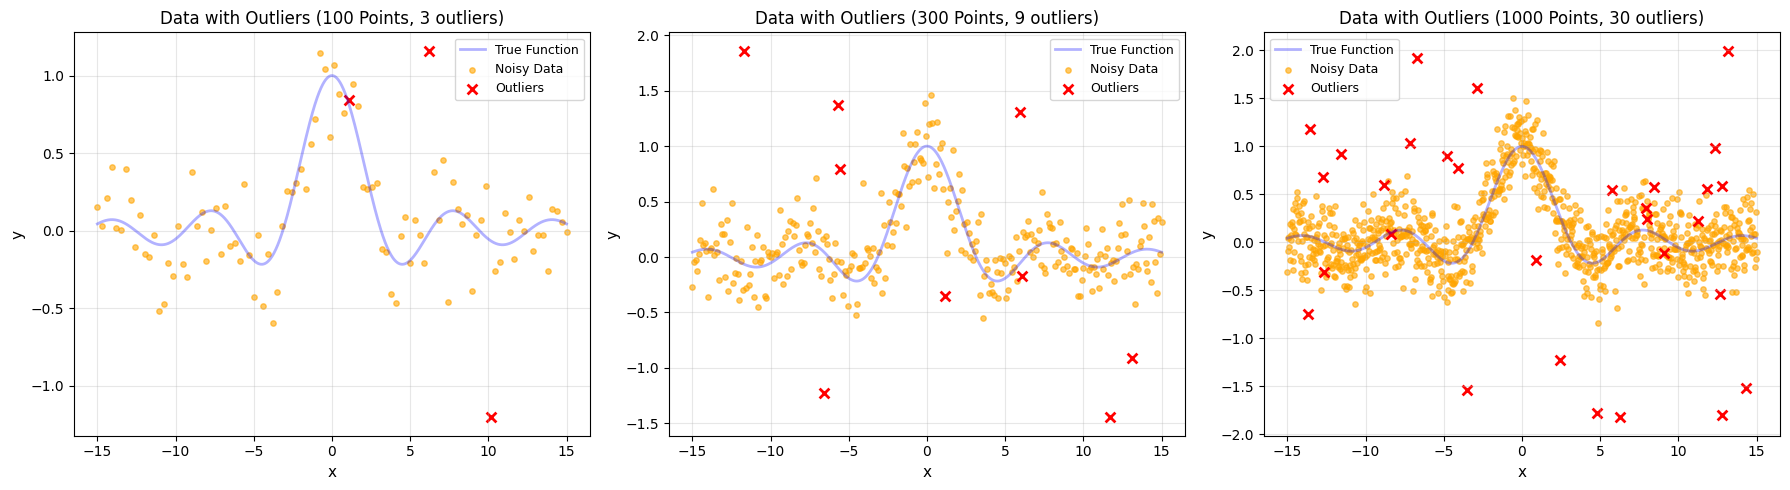

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n in enumerate(sampleSizes):
    axes[idx].plot(xRange, yRange, 'b-', alpha=0.3, label='True Function', linewidth=2)
    
    normalMask = np.ones(n, dtype=bool)
    normalMask[outlierData[n]['outlier_indices']] = False
    axes[idx].scatter(outlierData[n]['x'][normalMask], outlierData[n]['y'][normalMask], 
                     c='orange', s=15, alpha=0.6, label='Noisy Data')
    
    axes[idx].scatter(outlierData[n]['x'][outlierData[n]['outlier_indices']], 
                     outlierData[n]['y'][outlierData[n]['outlier_indices']], 
                     c='red', s=50, marker='x', linewidth=2, label='Outliers')
    
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'Data with Outliers ({n} Points, {len(outlierData[n]["outlier_indices"])} outliers)', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

<div dir="rtl">

# آزمایش مقاومت در برابر Outliers

**آزمایش کنترل شده:**

همه‌ی سه روش regularization را روی داده‌های حاوی outlier اجرا می‌کنیم تا ببینیم:

1. **آیا outliers باعث افزایش قابل توجه MSE می‌شوند؟**
2. **کدام روش کمتر تحت تأثیر outliers قرار می‌گیرد؟**
3. **آیا regularization به کاهش تأثیر outliers کمک می‌کند؟**

**فرضیات:**
- روش‌های robust باید MSE کمتری داشته باشند
- مقادیر بهینه‌ی $\alpha$ ممکن است متفاوت از حالت بدون outlier باشد

**نکته‌ی ارزیابی:** MSE را روی تابع واقعی (بدون outlier) محاسبه می‌کنیم تا ببینیم مدل چقدر به outlierها overfit شده است.

**روش‌های پیشرفته‌تر:**
- Huber Regression: ترکیب L1 و L2 برای robustness
- RANSAC: حذف outliers قبل از فیت کردن مدل
- M-estimators: وزن دادن متفاوت به نقاط

</div>

In [28]:
outlierRidgeResults = {n: {} for n in sampleSizes}
outlierLassoResults = {n: {} for n in sampleSizes}
outlierElasticResults = {n: {} for n in sampleSizes}

for n in sampleSizes:
    xTrain = outlierData[n]['x'].reshape(-1, 1)
    yTrain = outlierData[n]['y']
    yTrue = sincFunction(sampledData[n]['x'])
    
    poly = PolynomialFeatures(degree=fixedDegree)
    xTrainPoly = poly.fit_transform(xTrain)
    xRangePoly = poly.transform(xRange.reshape(-1, 1))
    
    for alpha in alphaValues:
        modelRidge = Ridge(alpha=alpha)
        modelRidge.fit(xTrainPoly, yTrain)
        yPredRidge = modelRidge.predict(xRangePoly)
        yPredTrainRidge = modelRidge.predict(xTrainPoly)
        
        mseRidge = mean_squared_error(yTrue, yPredTrainRidge)
        maeRidge = mean_absolute_error(yTrue, yPredTrainRidge)
        
        outlierRidgeResults[n][alpha] = {
            'prediction': yPredRidge,
            'mse': mseRidge,
            'mae': maeRidge
        }
        
        modelLasso = Lasso(alpha=alpha, max_iter=10000)
        modelLasso.fit(xTrainPoly, yTrain)
        yPredLasso = modelLasso.predict(xRangePoly)
        yPredTrainLasso = modelLasso.predict(xTrainPoly)
        
        mseLasso = mean_squared_error(yTrue, yPredTrainLasso)
        maeLasso = mean_absolute_error(yTrue, yPredTrainLasso)
        
        outlierLassoResults[n][alpha] = {
            'prediction': yPredLasso,
            'mse': mseLasso,
            'mae': maeLasso
        }
        
        modelElastic = ElasticNet(alpha=alpha, l1_ratio=l1Ratio, max_iter=10000)
        modelElastic.fit(xTrainPoly, yTrain)
        yPredElastic = modelElastic.predict(xRangePoly)
        yPredTrainElastic = modelElastic.predict(xTrainPoly)
        
        mseElastic = mean_squared_error(yTrue, yPredTrainElastic)
        maeElastic = mean_absolute_error(yTrue, yPredTrainElastic)
        
        outlierElasticResults[n][alpha] = {
            'prediction': yPredElastic,
            'mse': mseElastic,
            'mae': maeElastic
        }

print("Regression on outlier data completed.")

d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.26865e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.351e+00, tolerance: 1.567e-03
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.348e+00, tolerance: 1.567e-03
  model = cd_fast.enet_coordinate_descent(
d:\Python\envs\ML\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.31042e-28

Regression on outlier data completed.


d:\Python\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.058e+01, tolerance: 1.811e-02
  model = cd_fast.enet_coordinate_descent(


<div dir="rtl">

# نتایج و تفسیر Robustness

**مشاهدات کلیدی از نمودارها:**

1. **Ridge همچنان عملکرد بهتری دارد:**
   - حتی در حضور outliers، MSE پایین‌تری نسبت به Lasso و ElasticNet دارد
   - پایداری Ridge در شرایط مختلف تأیید می‌شود

2. **تأثیر تعداد نمونه:**
   - با 100 نمونه: outliers تأثیر زیادی دارند (3 نقطه از 100 = 3%)
   - با 1000 نمونه: تأثیر outliers کمتر می‌شود (30 نقطه از 1000 اما درصد کمتری از کل)

3. **MSE vs MAE:**
   - MSE به outliers حساس‌تر است (به خاطر مربع کردن خطا)
   - MAE معیار robust‌تری برای ارزیابی در حضور outliers است

**درس کلیدی:**

Regularization به تنهایی راه‌حل کامل برای outliers نیست. برای مقابله بهتر:
- پیش‌پردازش داده و شناسایی outliers
- استفاده از robust loss functions
- روش‌های ensemble

**چرا Ridge بهتر است؟**
- پنالتی L2 به صورت مداوم ضرایب را shrink می‌کند
- کمتر به تک تک نقاط وابسته است
- smoothness بیشتری در فضای پارامتر ایجاد می‌کند

</div>

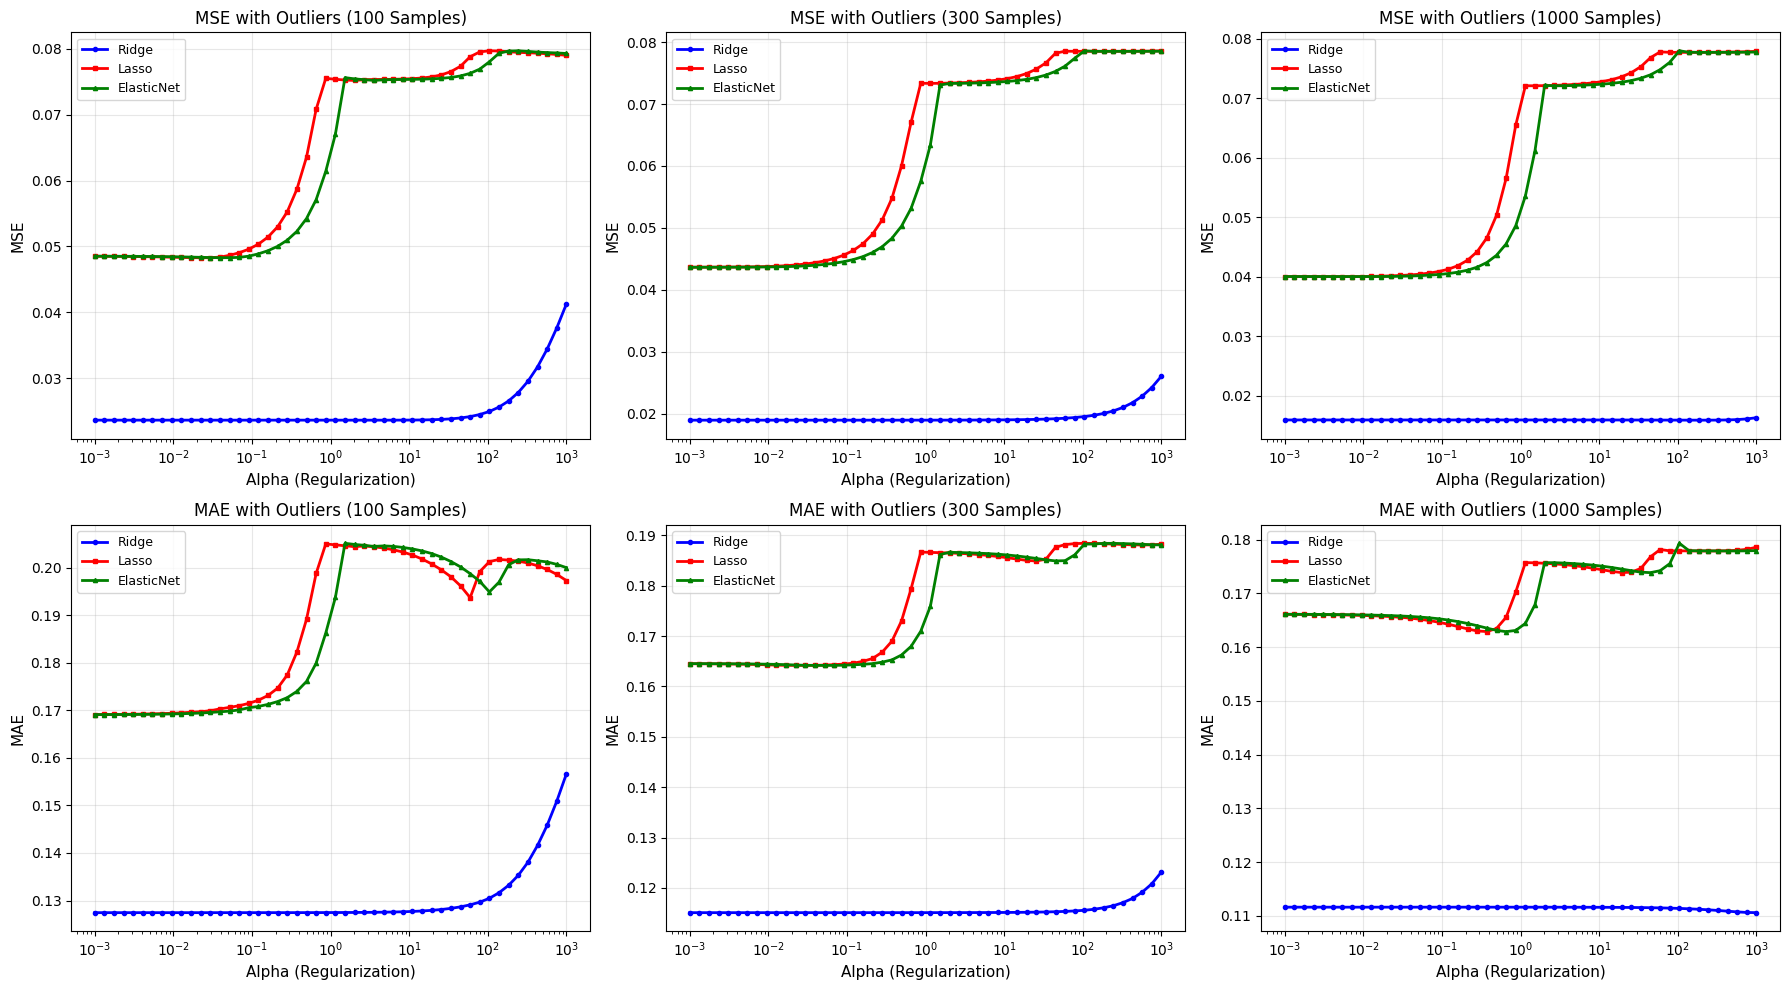

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(sampleSizes):
    alphas = list(outlierRidgeResults[n].keys())
    
    mseRidge = [outlierRidgeResults[n][a]['mse'] for a in alphas]
    mseLasso = [outlierLassoResults[n][a]['mse'] for a in alphas]
    mseElastic = [outlierElasticResults[n][a]['mse'] for a in alphas]
    
    maeRidge = [outlierRidgeResults[n][a]['mae'] for a in alphas]
    maeLasso = [outlierLassoResults[n][a]['mae'] for a in alphas]
    maeElastic = [outlierElasticResults[n][a]['mae'] for a in alphas]
    
    axes[0, idx].plot(alphas, mseRidge, 'b-o', label='Ridge', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseLasso, 'r-s', label='Lasso', linewidth=2, markersize=3)
    axes[0, idx].plot(alphas, mseElastic, 'g-^', label='ElasticNet', linewidth=2, markersize=3)
    axes[0, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[0, idx].set_ylabel('MSE', fontsize=11)
    axes[0, idx].set_title(f'MSE with Outliers ({n} Samples)', fontsize=12)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].set_xscale('log')
    
    axes[1, idx].plot(alphas, maeRidge, 'b-o', label='Ridge', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, maeLasso, 'r-s', label='Lasso', linewidth=2, markersize=3)
    axes[1, idx].plot(alphas, maeElastic, 'g-^', label='ElasticNet', linewidth=2, markersize=3)
    axes[1, idx].set_xlabel('Alpha (Regularization)', fontsize=11)
    axes[1, idx].set_ylabel('MAE', fontsize=11)
    axes[1, idx].set_title(f'MAE with Outliers ({n} Samples)', fontsize=12)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].set_xscale('log')

plt.tight_layout()
plt.show()

<div dir="rtl">

# جمع‌بندی و تحلیل نهایی

**خلاصه‌ی آزمایش‌های انجام شده:**

| سناریو | هدف | روش‌های مقایسه شده |
|--------|------|-------------------|
| **داده‌های تمیز** | baseline عملکرد | Linear, Polynomial, Ridge, Lasso, ElasticNet |
| **داده‌های نویزدار** | robustness به نویز گوسی | همه‌ی روش‌ها |
| **داده‌های با outlier** | robustness به نقاط پرت | روش‌های regularization |

**ساختار جدول خلاصه:**
- سطرها: ترکیب تعداد نمونه و نوع داده
- ستون‌ها: بهترین MSE برای هر روش
- هدف: مقایسه‌ی کمّی و یافتن الگوها

**تحلیل آماری:**
- افزایش تعداد نمونه چقدر به بهبود عملکرد کمک می‌کند؟
- کدام روش در کدام شرایط بهترین است؟
- trade-off بین پیچیدگی مدل و generalization

</div>

In [30]:
summaryData = []

for n in sampleSizes:
    alphas = list(ridgeResults['clean'][n].keys())
    
    mseRidgeClean = [ridgeResults['clean'][n][a]['mse'] for a in alphas]
    bestRidgeClean = min(mseRidgeClean)
    
    mseLassoClean = [lassoResults['clean'][n][a]['mse'] for a in alphas]
    bestLassoClean = min(mseLassoClean)
    
    mseElasticClean = [elasticNetResults['clean'][n][a]['mse'] for a in alphas]
    bestElasticClean = min(mseElasticClean)
    
    mseRidgeNoisy = [ridgeResults['noisy'][n][a]['mse'] for a in alphas]
    bestRidgeNoisy = min(mseRidgeNoisy)
    
    mseLassoNoisy = [lassoResults['noisy'][n][a]['mse'] for a in alphas]
    bestLassoNoisy = min(mseLassoNoisy)
    
    mseElasticNoisy = [elasticNetResults['noisy'][n][a]['mse'] for a in alphas]
    bestElasticNoisy = min(mseElasticNoisy)
    
    mseRidgeOutlier = [outlierRidgeResults[n][a]['mse'] for a in alphas]
    bestRidgeOutlier = min(mseRidgeOutlier)
    
    mseLassoOutlier = [outlierLassoResults[n][a]['mse'] for a in alphas]
    bestLassoOutlier = min(mseLassoOutlier)
    
    mseElasticOutlier = [outlierElasticResults[n][a]['mse'] for a in alphas]
    bestElasticOutlier = min(mseElasticOutlier)
    
    summaryData.append({
        'Samples': n,
        'Data Type': 'Clean',
        'Ridge MSE': bestRidgeClean,
        'Lasso MSE': bestLassoClean,
        'ElasticNet MSE': bestElasticClean
    })
    
    summaryData.append({
        'Samples': n,
        'Data Type': 'Noisy',
        'Ridge MSE': bestRidgeNoisy,
        'Lasso MSE': bestLassoNoisy,
        'ElasticNet MSE': bestElasticNoisy
    })
    
    summaryData.append({
        'Samples': n,
        'Data Type': 'Outliers',
        'Ridge MSE': bestRidgeOutlier,
        'Lasso MSE': bestLassoOutlier,
        'ElasticNet MSE': bestElasticOutlier
    })

summaryDF = pd.DataFrame(summaryData)
print("Summary of Best MSE Values for Each Method:\n")
print(summaryDF.to_string(index=False))

Summary of Best MSE Values for Each Method:

 Samples Data Type  Ridge MSE  Lasso MSE  ElasticNet MSE
     100     Clean   0.016230   0.040156        0.040152
     100     Noisy   0.020918   0.044776        0.044776
     100  Outliers   0.023598   0.048269        0.048276
     300     Clean   0.015735   0.039905        0.039901
     300     Noisy   0.016735   0.041396        0.041392
     300  Outliers   0.018954   0.043648        0.043644
    1000     Clean   0.015504   0.039792        0.039788
    1000     Noisy   0.015952   0.040036        0.040034
    1000  Outliers   0.015890   0.040027        0.040028


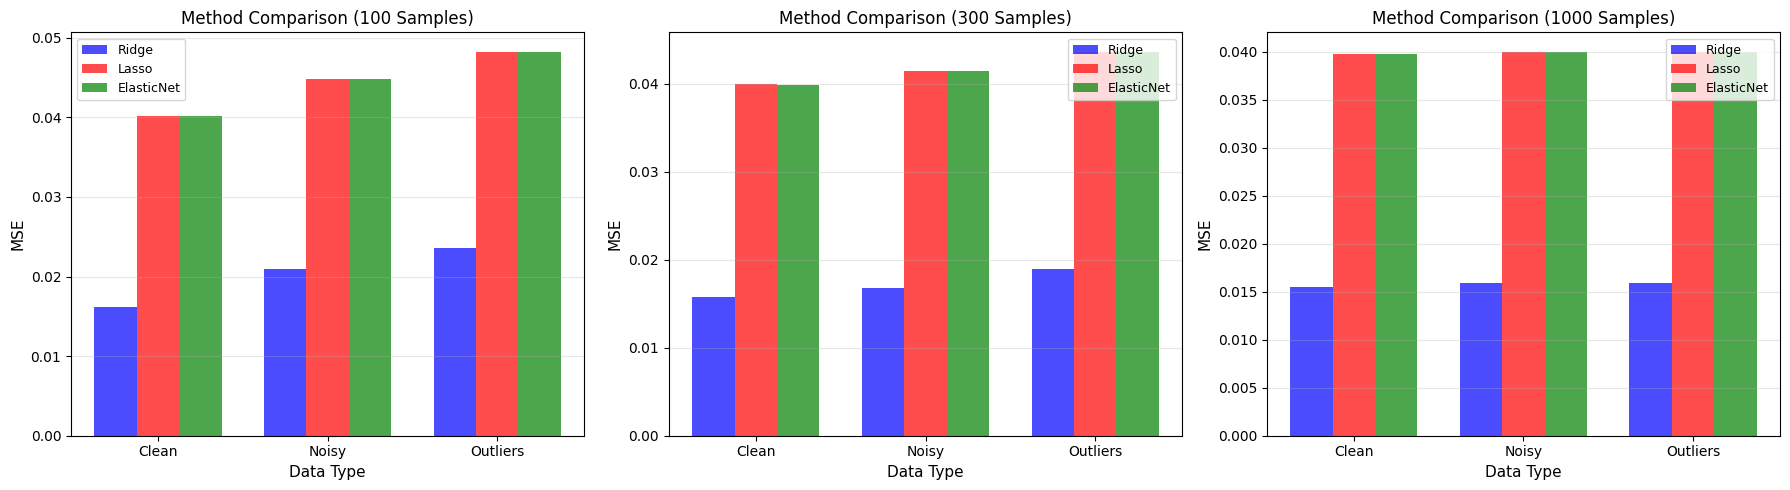

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

dataTypes = ['Clean', 'Noisy', 'Outliers']
methods = ['Ridge MSE', 'Lasso MSE', 'ElasticNet MSE']
colors = ['blue', 'red', 'green']

for idx, n in enumerate(sampleSizes):
    subsetDF = summaryDF[summaryDF['Samples'] == n]
    
    x = np.arange(len(dataTypes))
    width = 0.25
    
    for i, method in enumerate(methods):
        values = subsetDF[method].values
        axes[idx].bar(x + i*width, values, width, label=method.replace(' MSE', ''), color=colors[i], alpha=0.7)
    
    axes[idx].set_xlabel('Data Type', fontsize=11)
    axes[idx].set_ylabel('MSE', fontsize=11)
    axes[idx].set_title(f'Method Comparison ({n} Samples)', fontsize=12)
    axes[idx].set_xticks(x + width)
    axes[idx].set_xticklabels(dataTypes)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()